In [1]:
import numpy as np
import scanpy as sc
import seaborn as sns
from scipy.stats import median_abs_deviation

sc.settings.verbosity = 0
sc.settings.set_figure_params(
    dpi=80,
    facecolor="white",
    frameon=False,
)

In [3]:
adata = sc.read_10x_h5(
    filename="/mnt/c/Users/ethan/OneDrive/桌面/sc1186deepseq/data/2054_00_raw_.h5",
)
adata

/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 98896 × 37143
    var: 'gene_ids', 'feature_types', 'genome'

In [4]:
adata.var_names_make_unique()
adata

AnnData object with n_obs × n_vars = 98896 × 37143
    var: 'gene_ids', 'feature_types', 'genome'

In [5]:
# mitochondrial genes
adata.var["mt"] = adata.var_names.str.startswith("MT-")
# ribosomal genes
adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes.
adata.var["hb"] = adata.var_names.str.contains(("^HB[^(P)]"))

In [6]:
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt", "ribo", "hb"], inplace=True, percent_top=[20], log1p=True
)
adata

AnnData object with n_obs × n_vars = 98896 × 37143
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


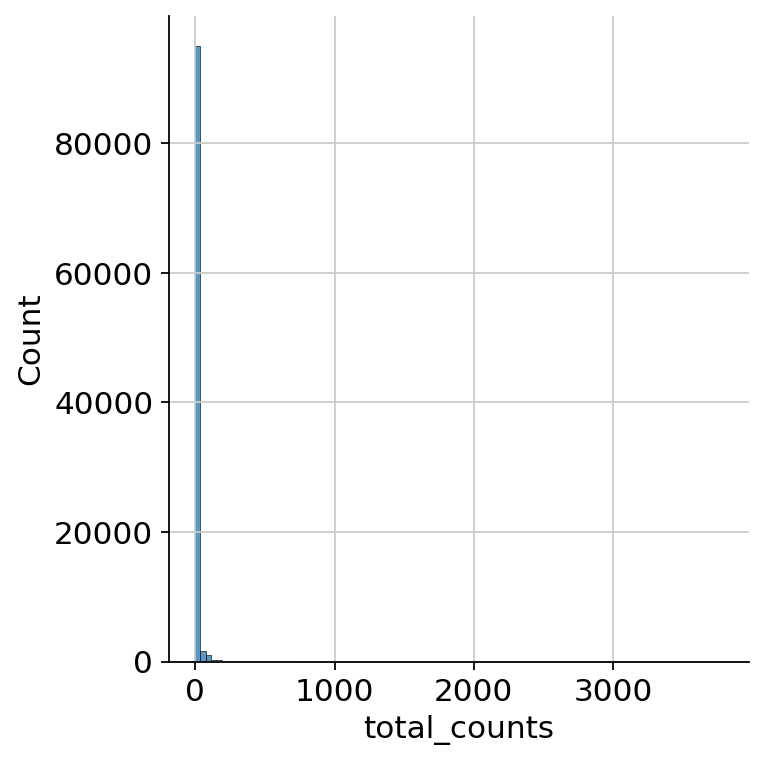

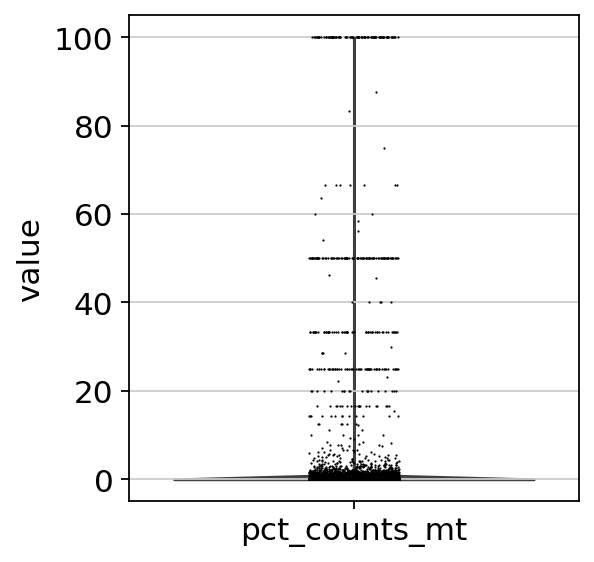

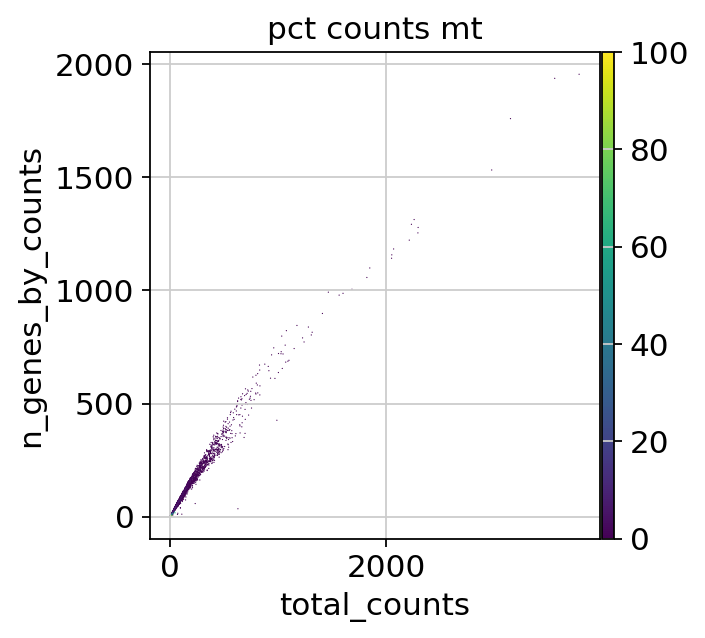

In [7]:
p1 = sns.displot(adata.obs["total_counts"], bins=100, kde=False)
# sc.pl.violin(adata, 'total_counts')
p2 = sc.pl.violin(adata, "pct_counts_mt")
p3 = sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

Processing file: 2054_00_raw_.h5


/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future vers

Plots saved for file: 2054_00_raw_.h5

Processing file: 2060_41_raw_.h5


/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future vers

Plots saved for file: 2060_41_raw_.h5

Processing file: 2070_00_raw_.h5


/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future vers

Plots saved for file: 2070_00_raw_.h5

Processing file: 2072_00_raw_.h5


/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future vers

Plots saved for file: 2072_00_raw_.h5

Processing file: 2074_00_raw_.h5


/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/seaborn/axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)
/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: W

Plots saved for file: 2074_00_raw_.h5

Processing file: 2075_00_raw_.h5


/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future vers

Plots saved for file: 2075_00_raw_.h5

Processing file: 2094_01_raw_.h5


/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future vers

Plots saved for file: 2094_01_raw_.h5

Processing file: S14_00_raw_.h5


/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future vers

Plots saved for file: S14_00_raw_.h5

Processing file: S15_00_raw_.h5


/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future vers

Plots saved for file: S15_00_raw_.h5

Processing file: S16_00_raw_.h5


/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future vers

Plots saved for file: S16_00_raw_.h5

Processing file: S17_00_raw_.h5


/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future vers

Plots saved for file: S17_00_raw_.h5

All files processed and plots saved.


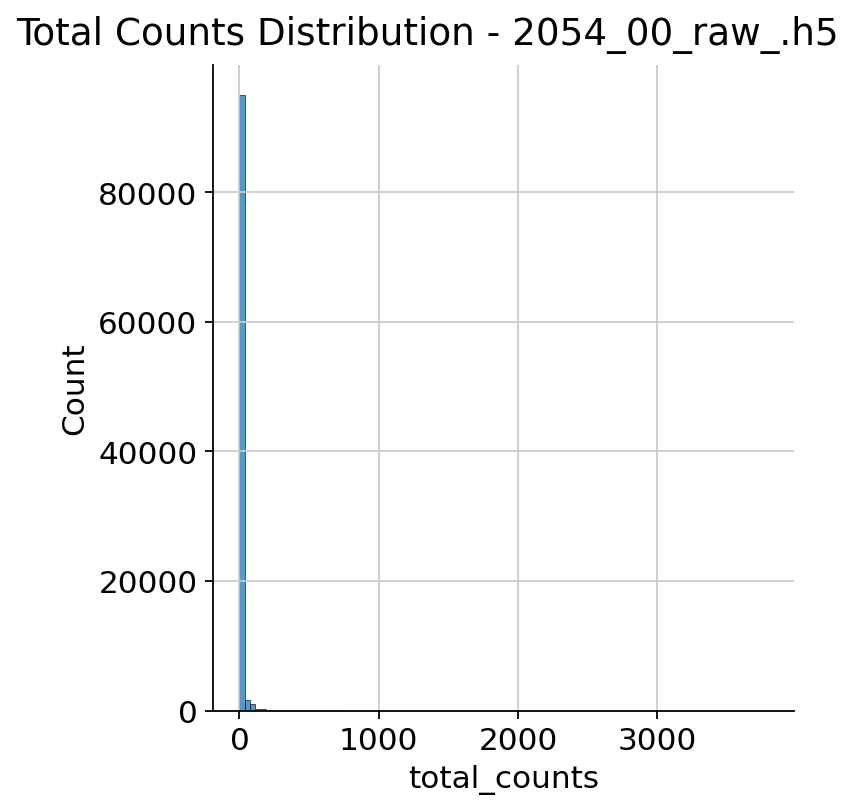

<Figure size 480x320 with 0 Axes>

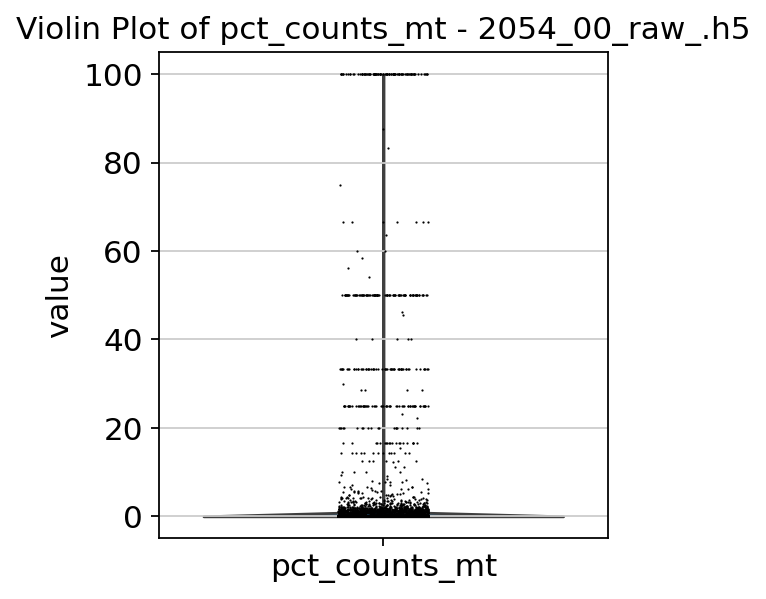

<Figure size 480x320 with 0 Axes>

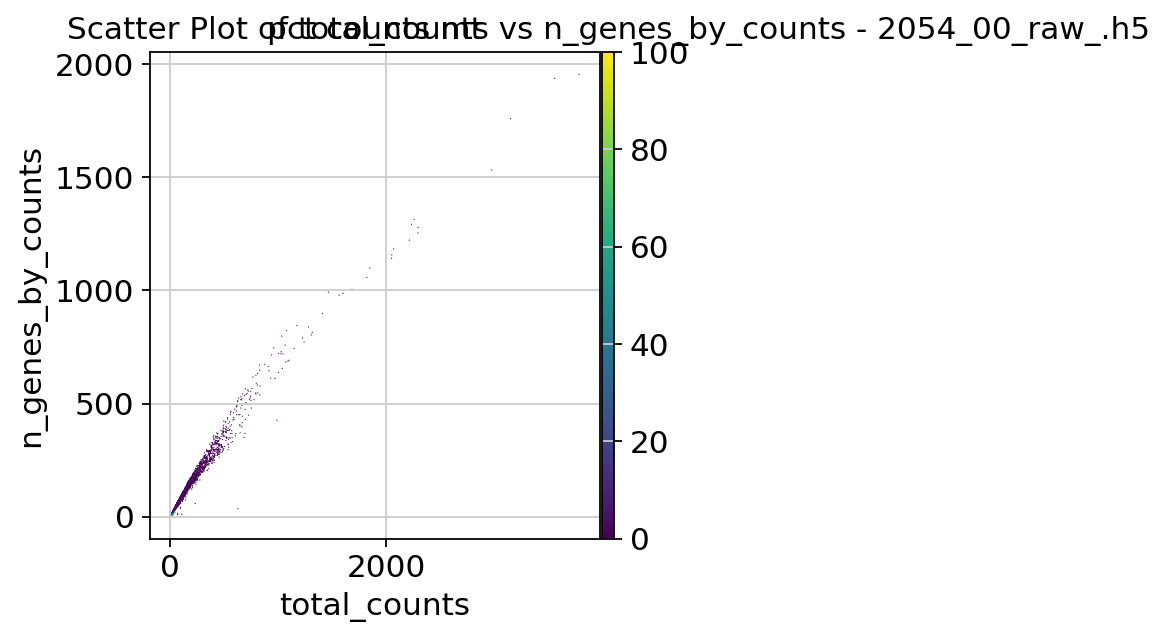

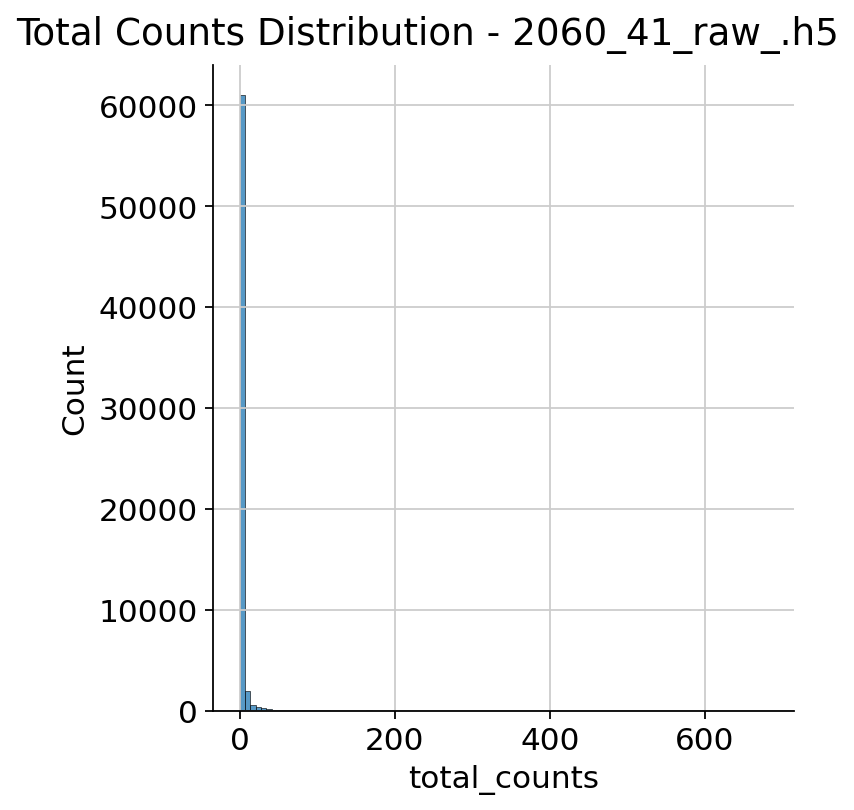

<Figure size 480x320 with 0 Axes>

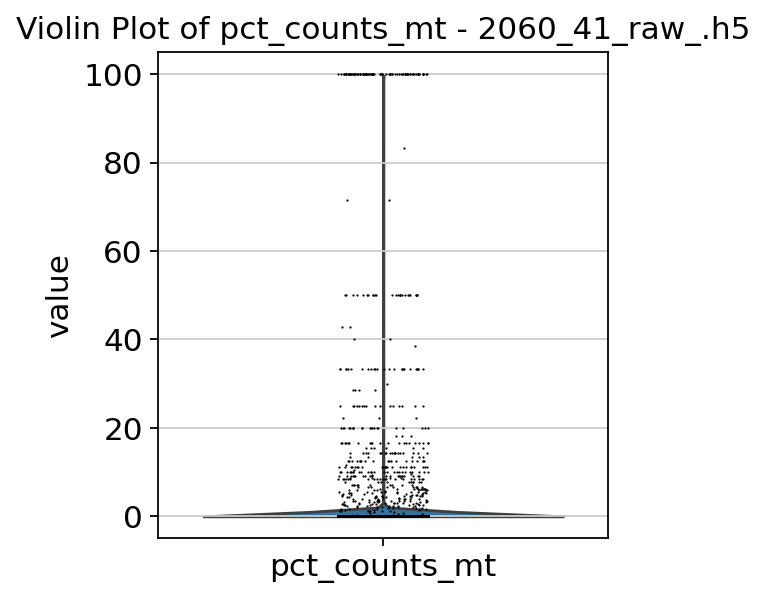

<Figure size 480x320 with 0 Axes>

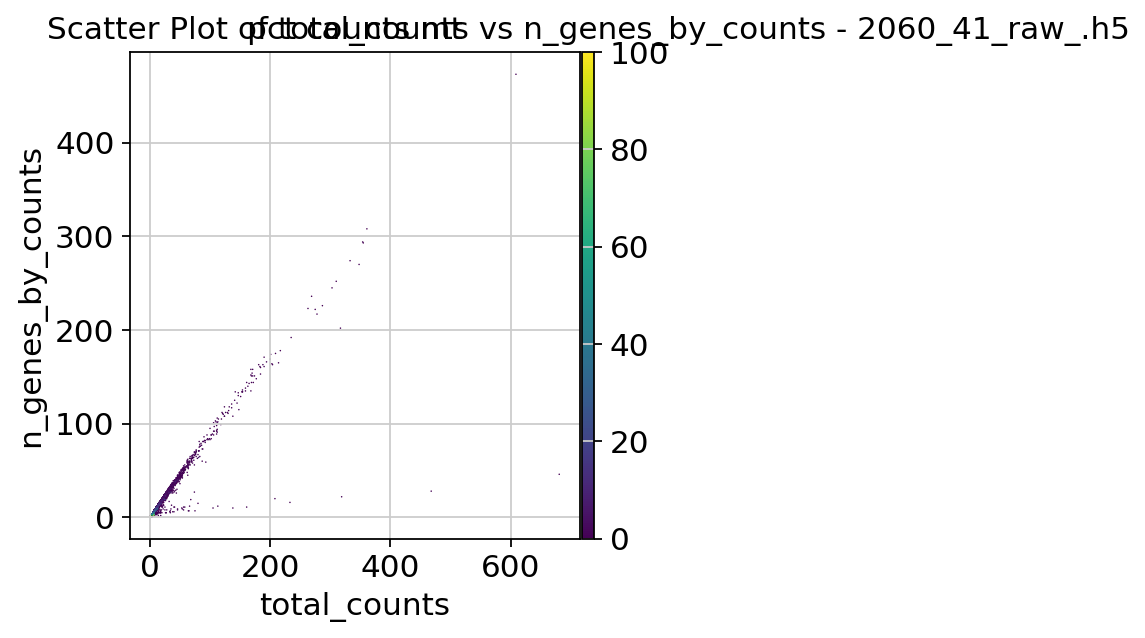

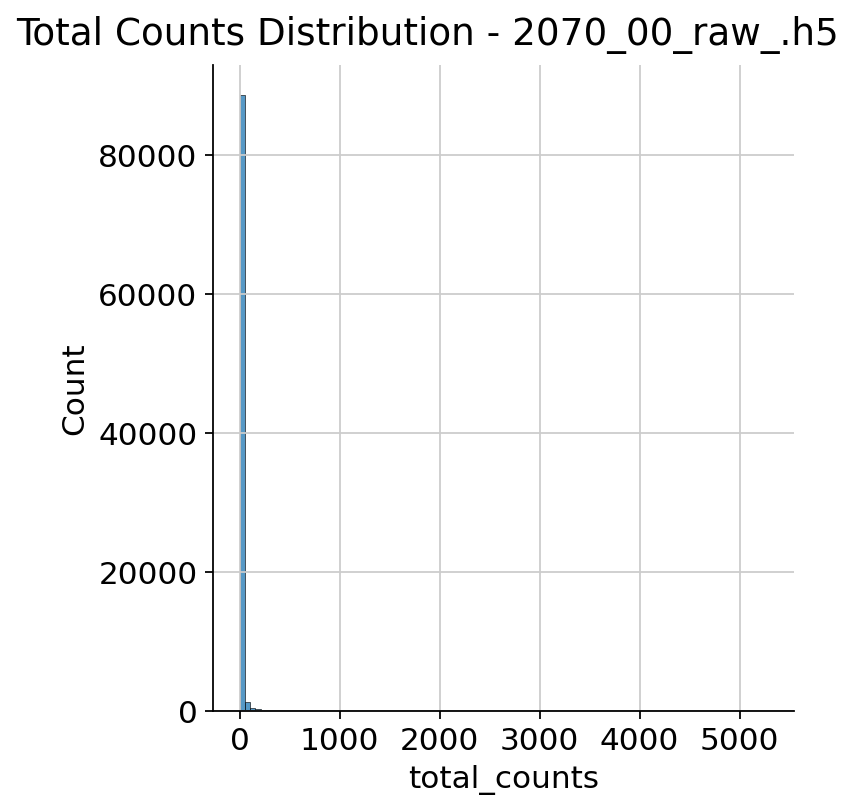

<Figure size 480x320 with 0 Axes>

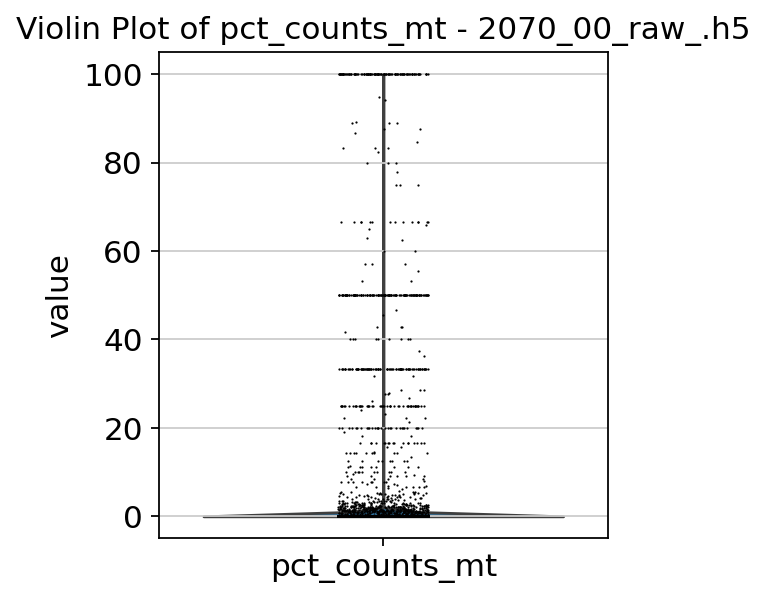

<Figure size 480x320 with 0 Axes>

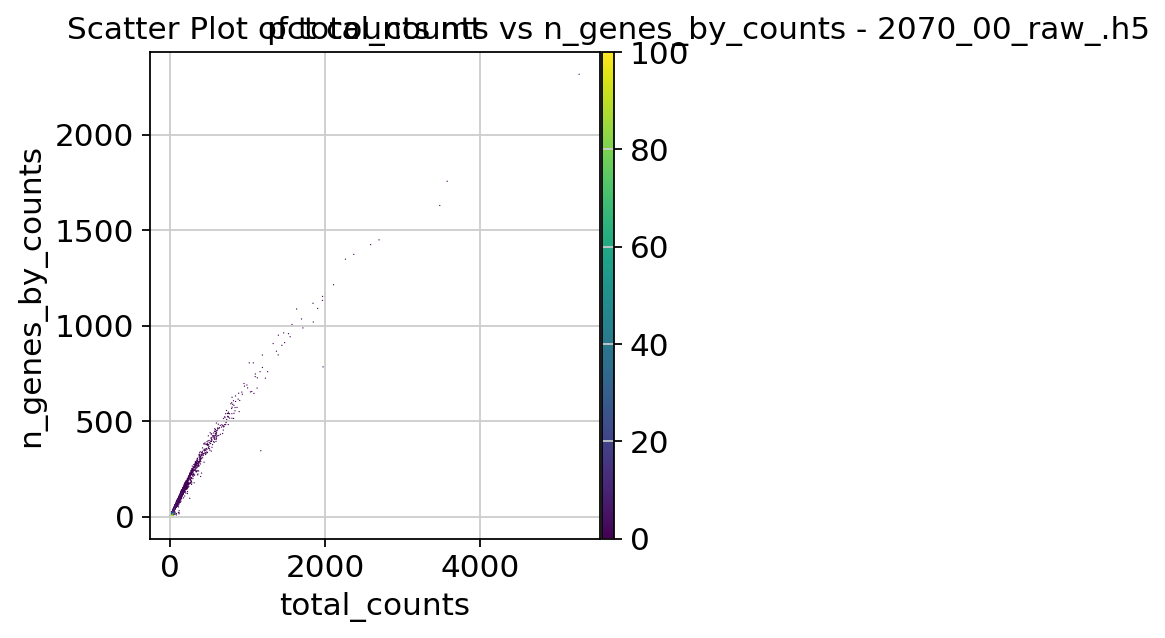

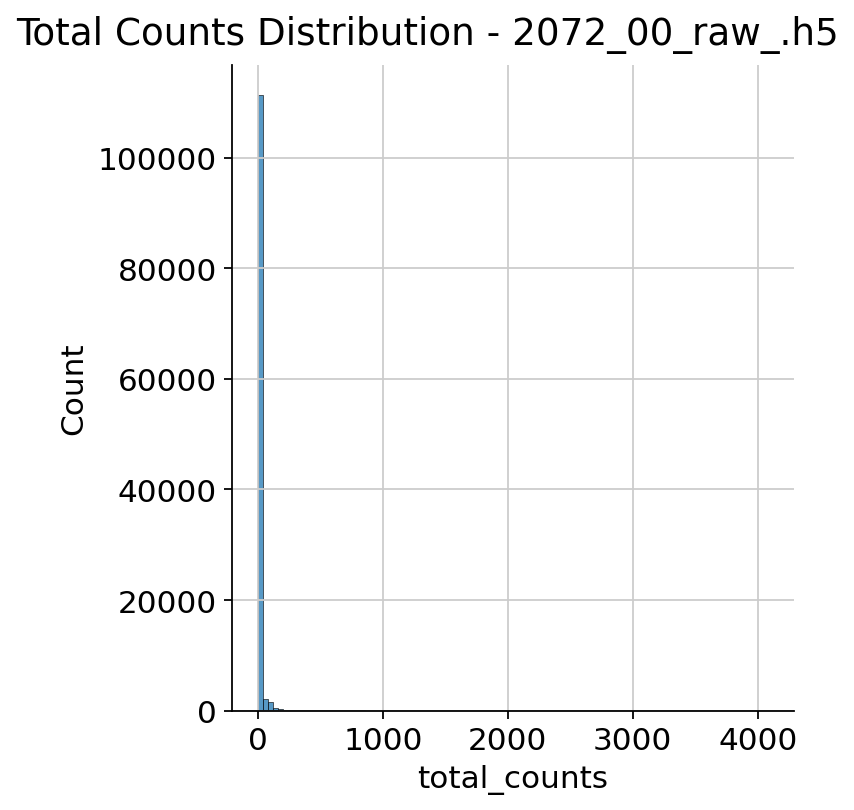

<Figure size 480x320 with 0 Axes>

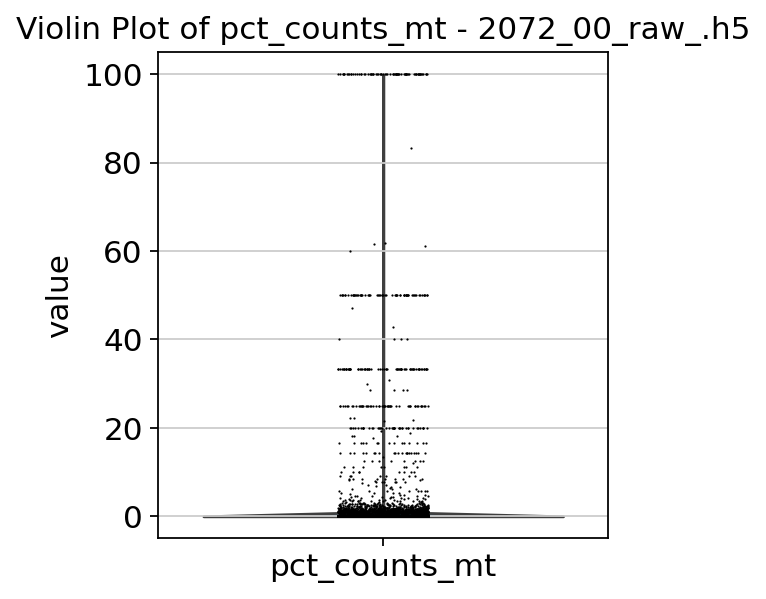

<Figure size 480x320 with 0 Axes>

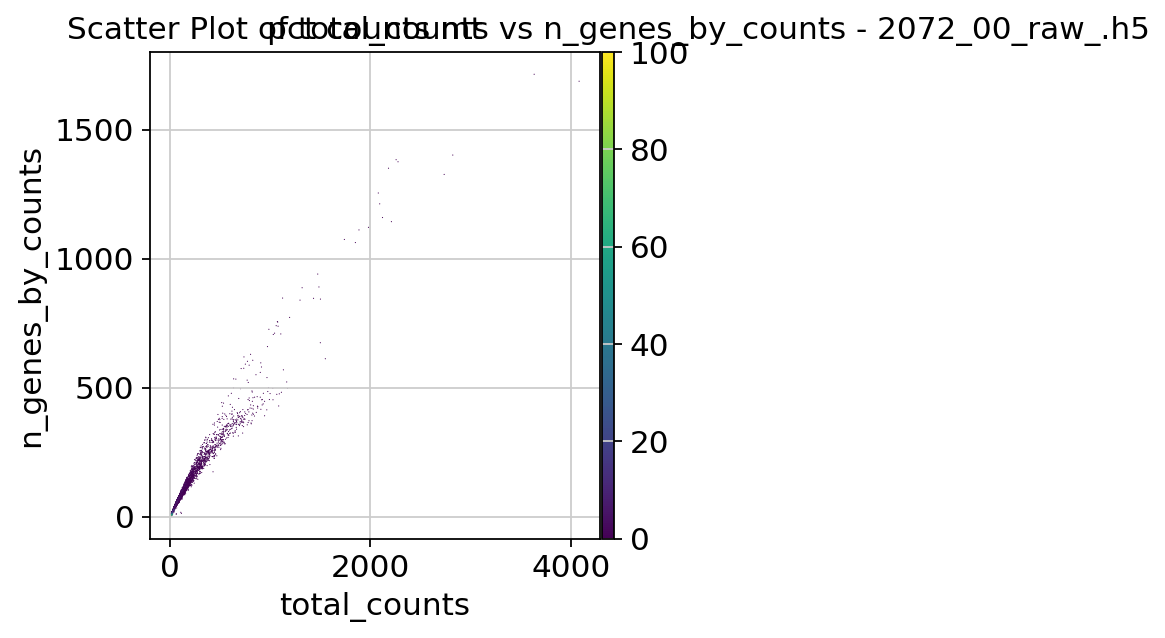

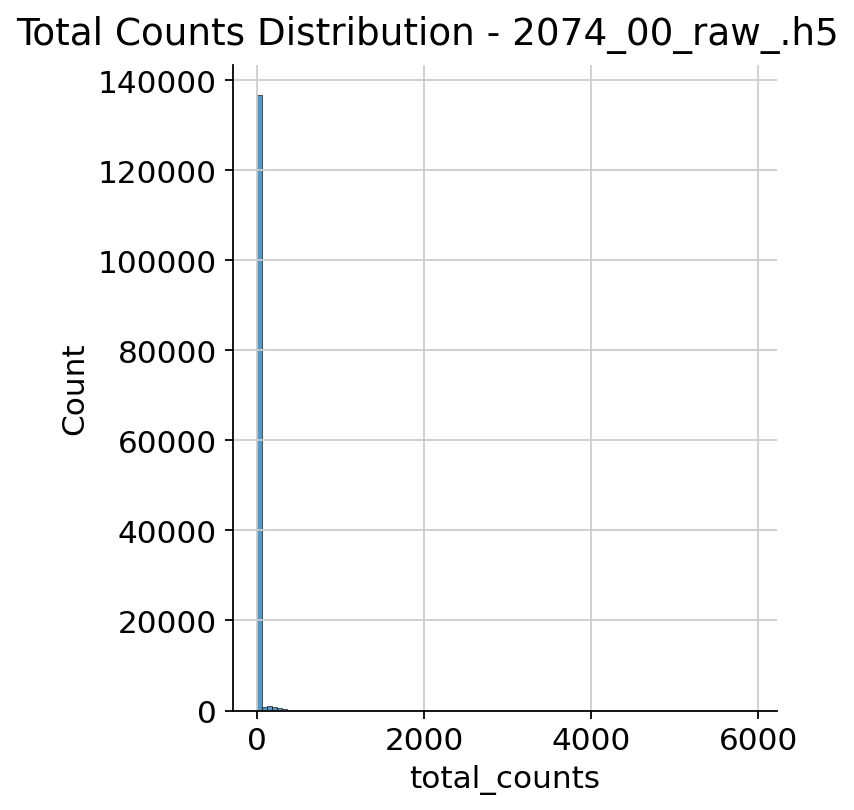

<Figure size 480x320 with 0 Axes>

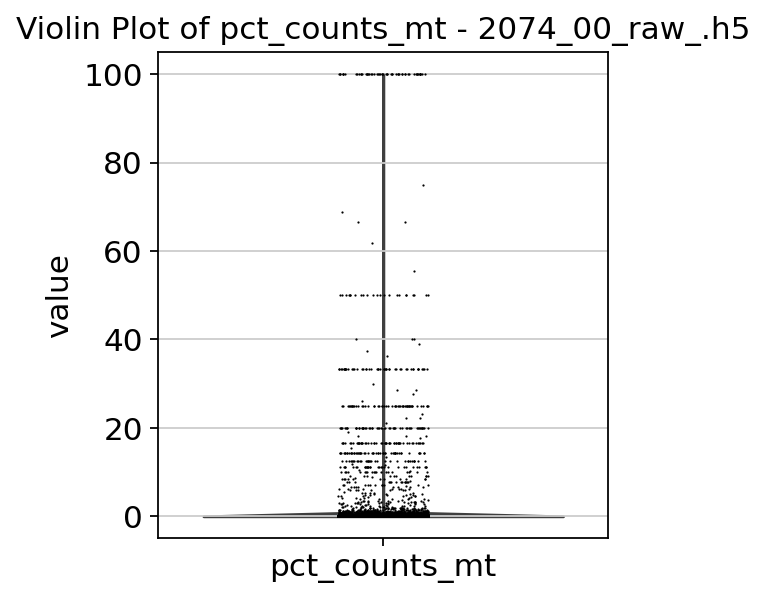

<Figure size 480x320 with 0 Axes>

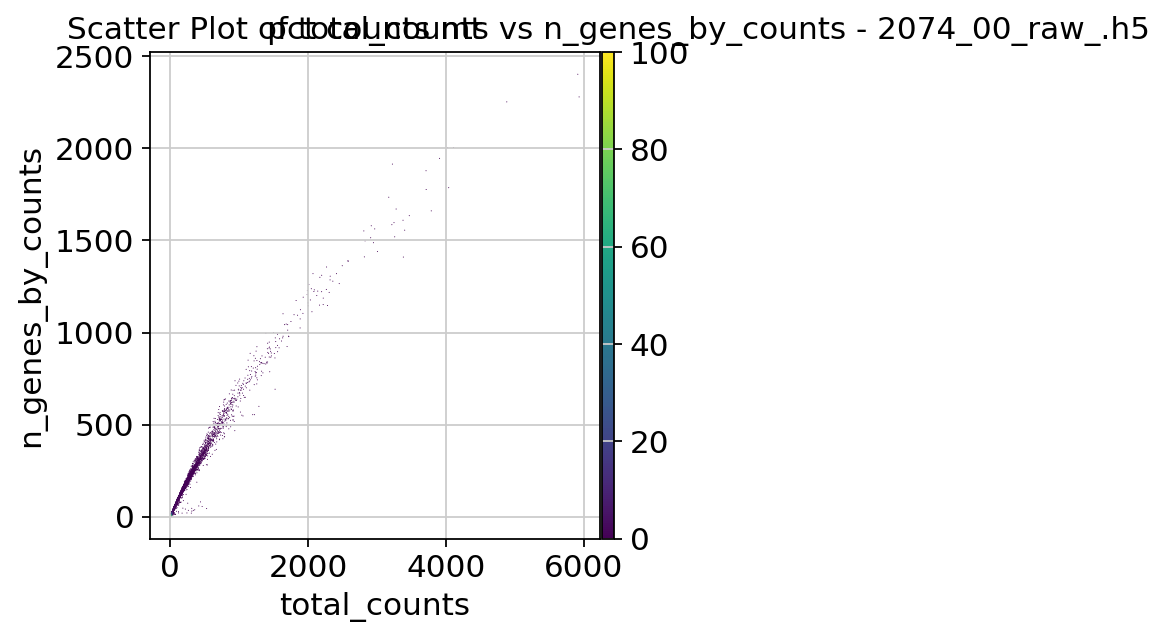

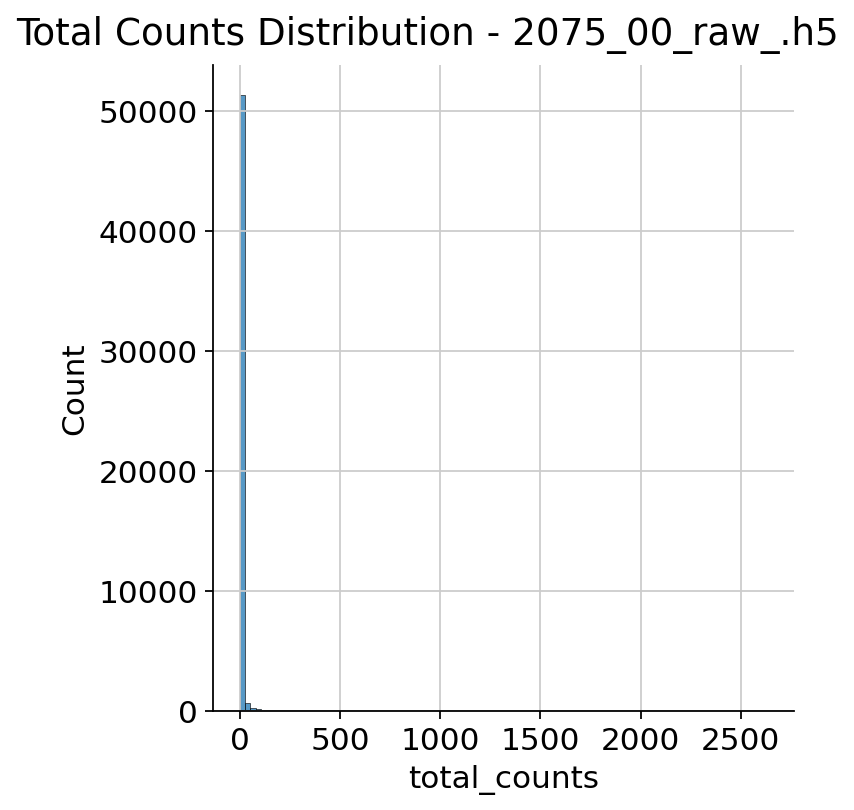

<Figure size 480x320 with 0 Axes>

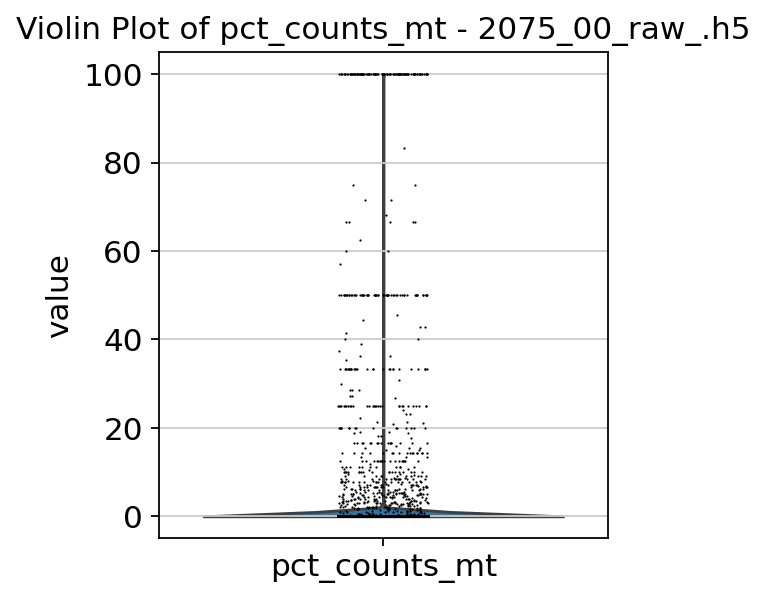

<Figure size 480x320 with 0 Axes>

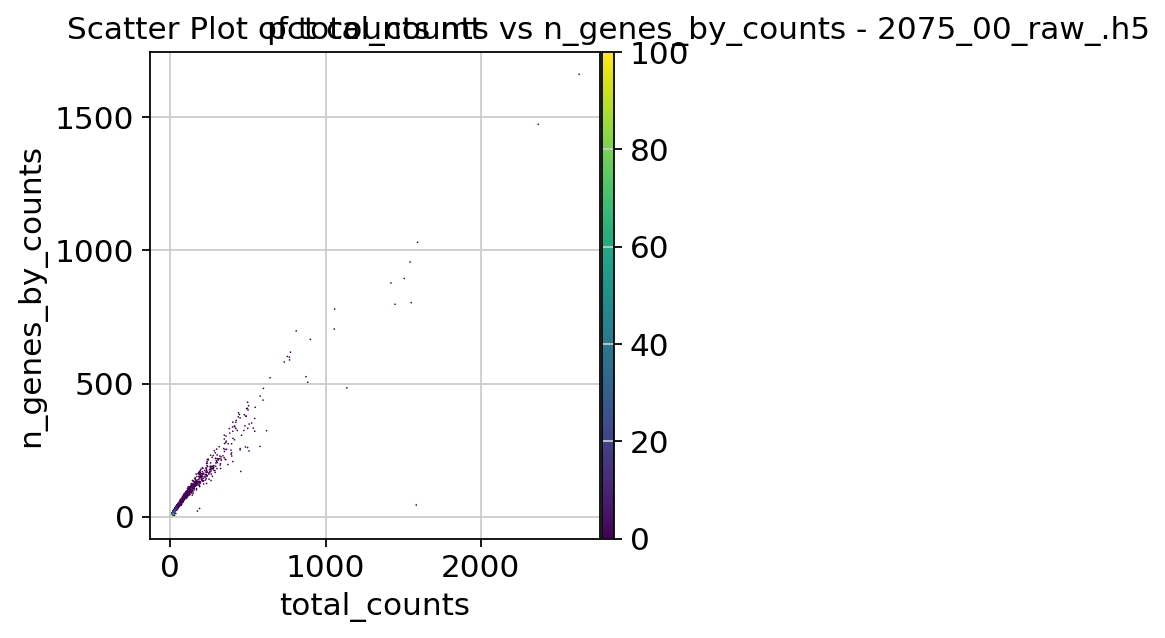

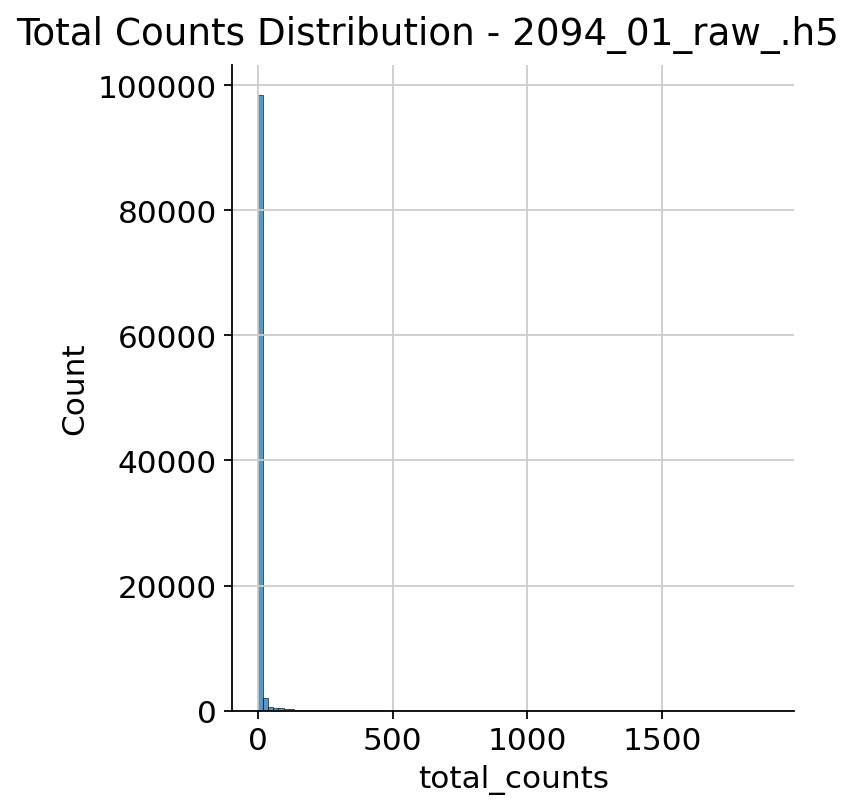

<Figure size 480x320 with 0 Axes>

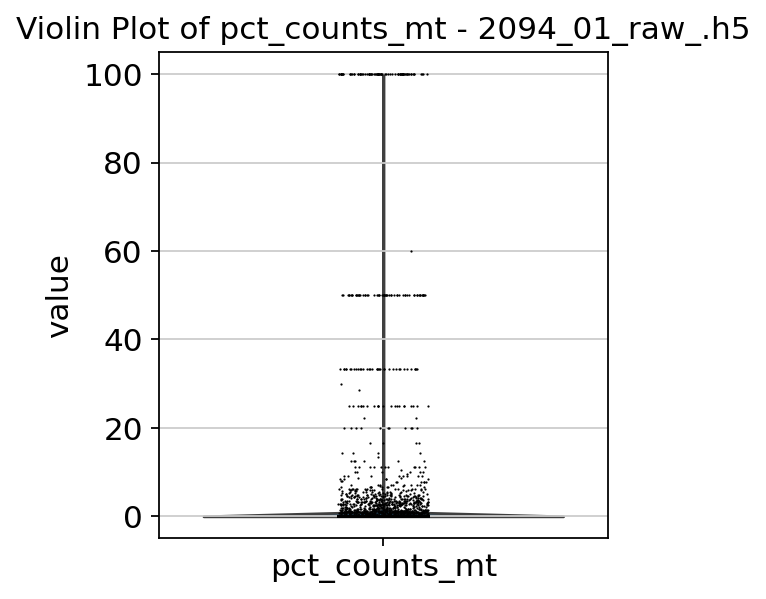

<Figure size 480x320 with 0 Axes>

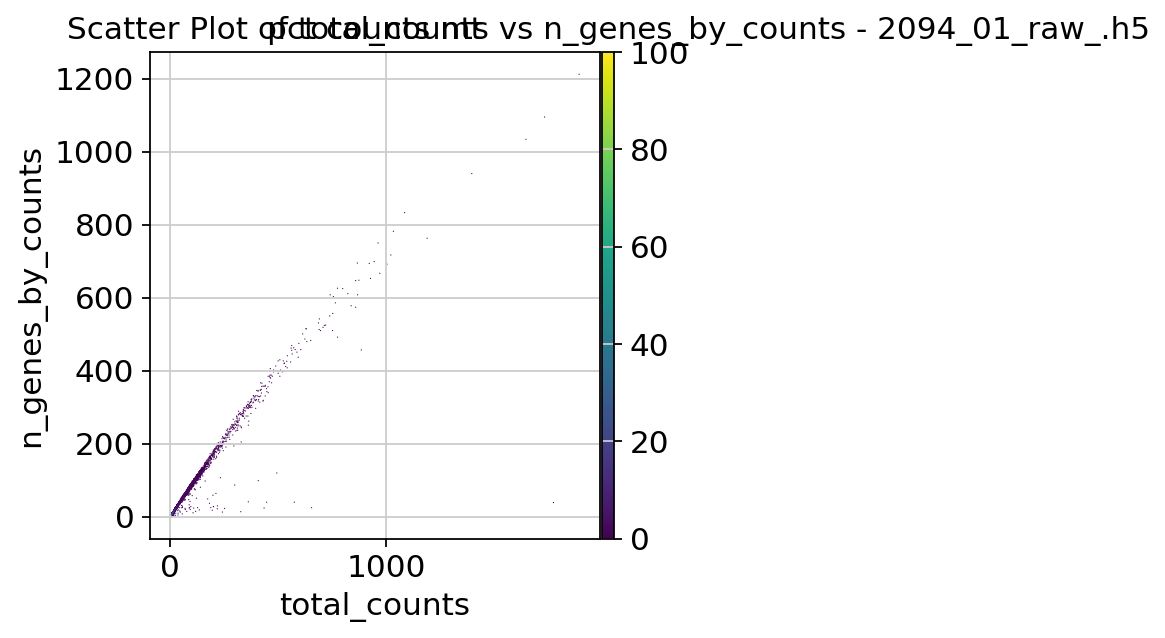

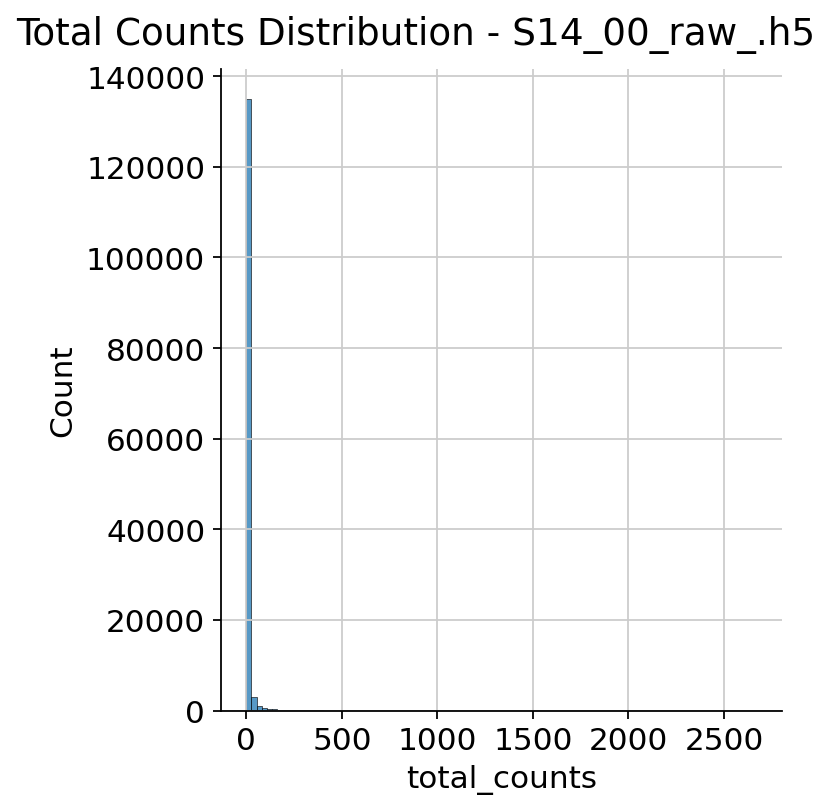

<Figure size 480x320 with 0 Axes>

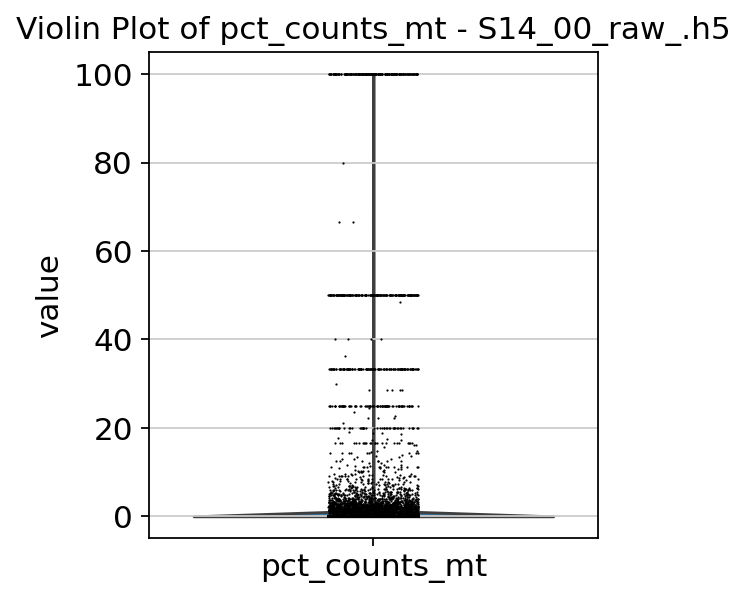

<Figure size 480x320 with 0 Axes>

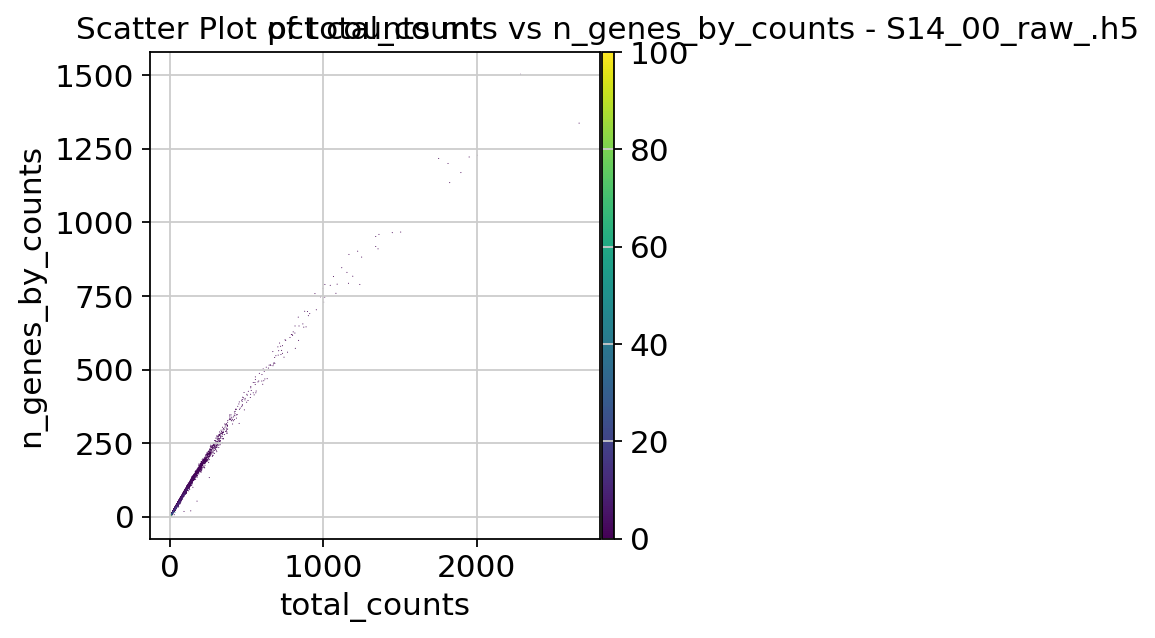

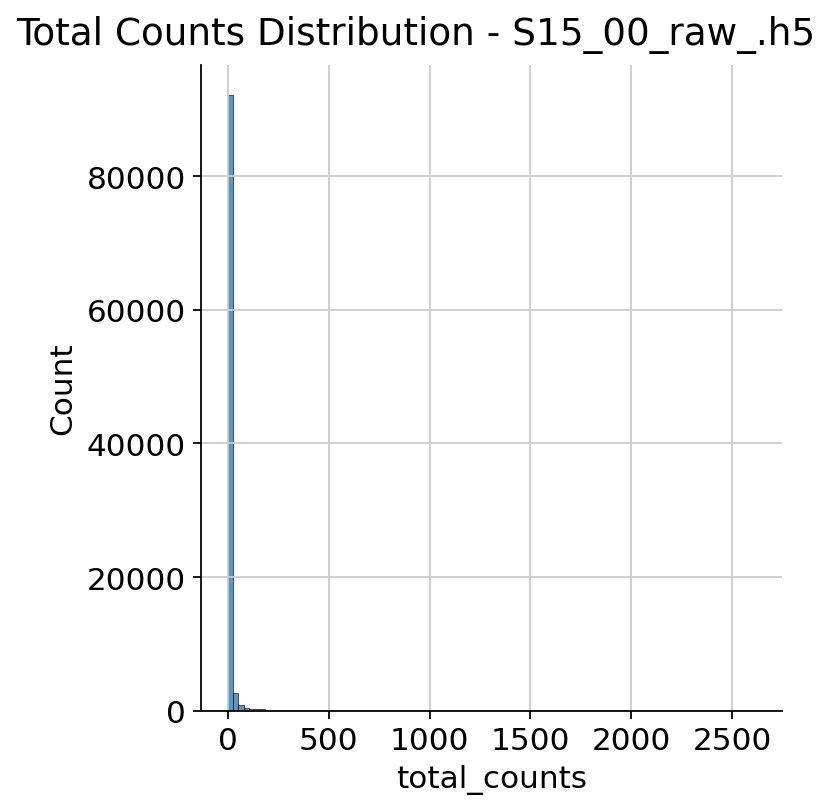

<Figure size 480x320 with 0 Axes>

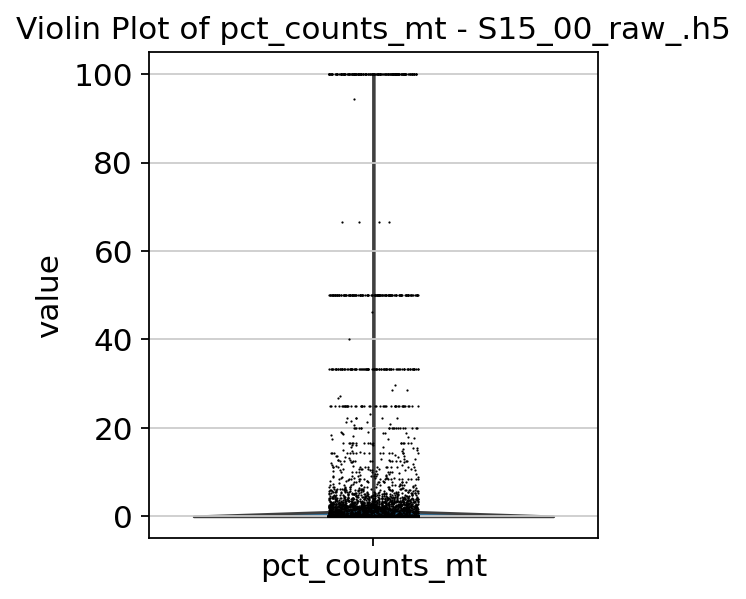

<Figure size 480x320 with 0 Axes>

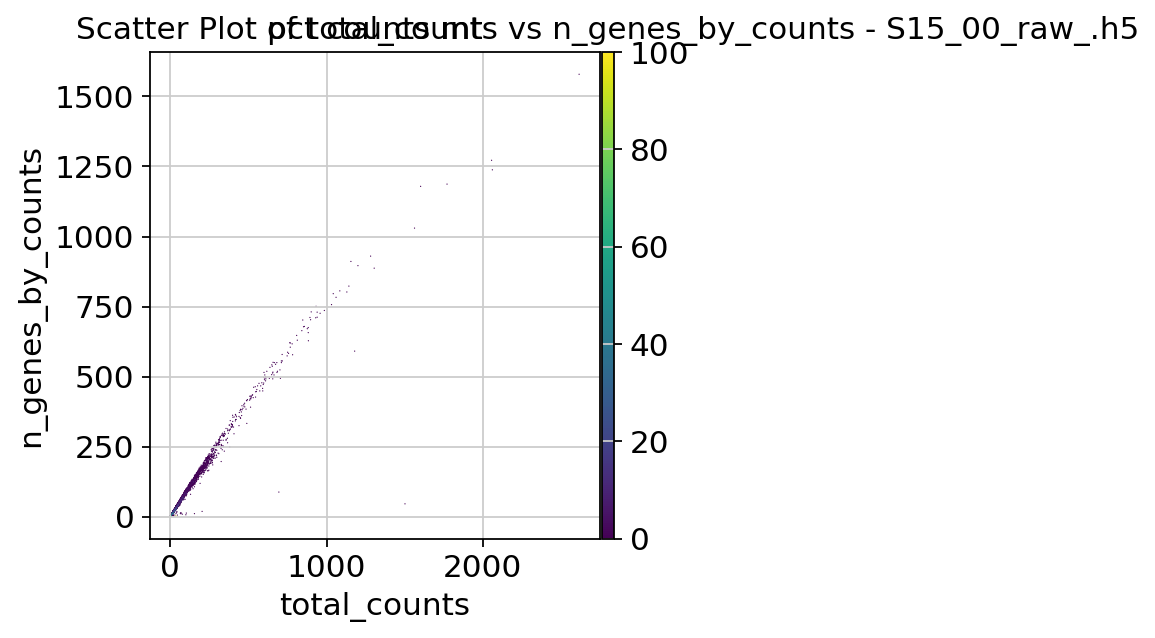

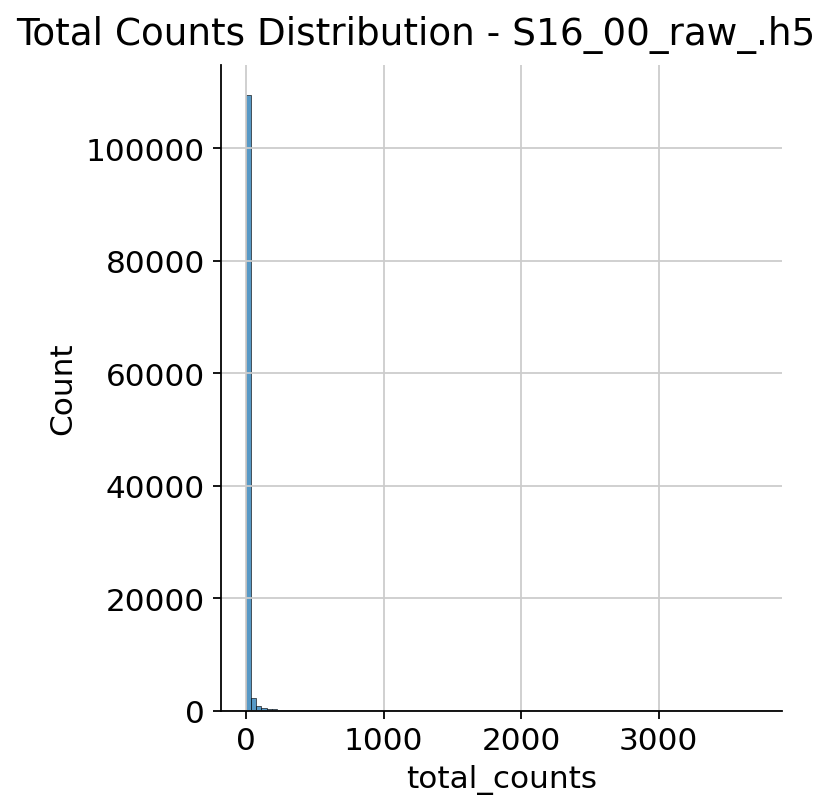

<Figure size 480x320 with 0 Axes>

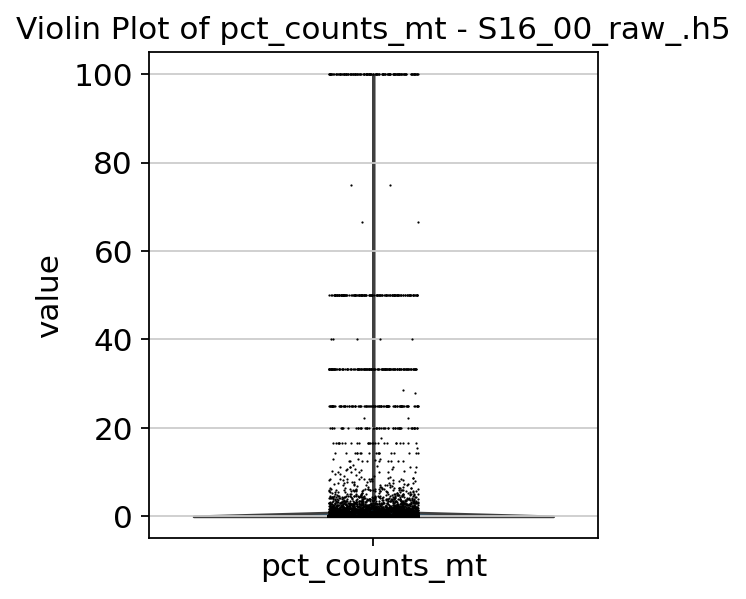

<Figure size 480x320 with 0 Axes>

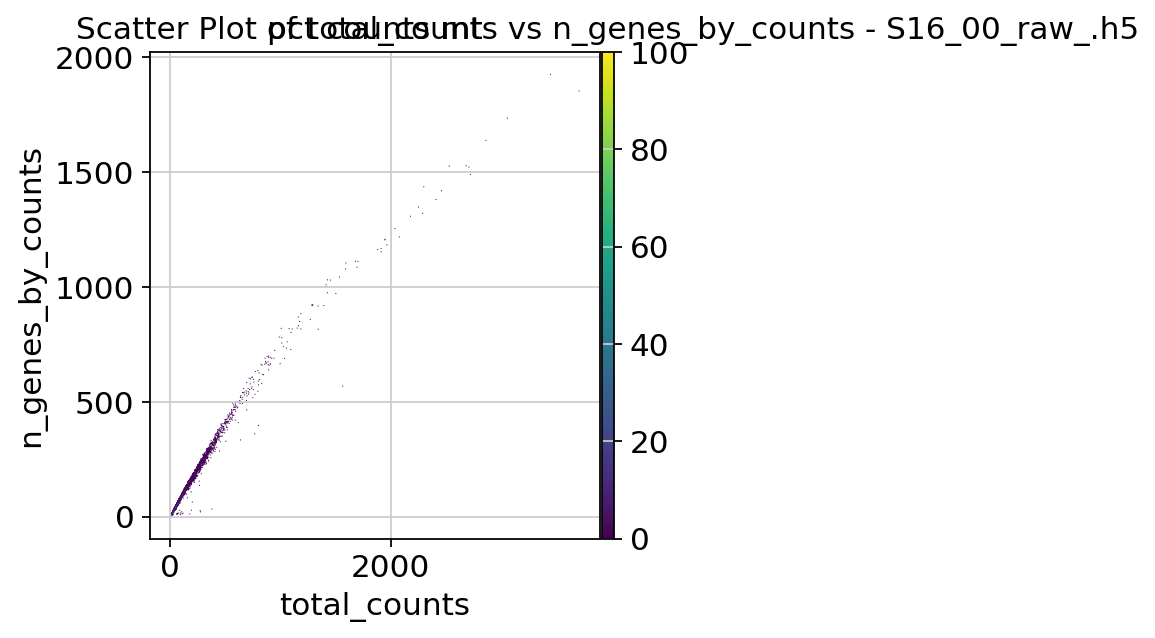

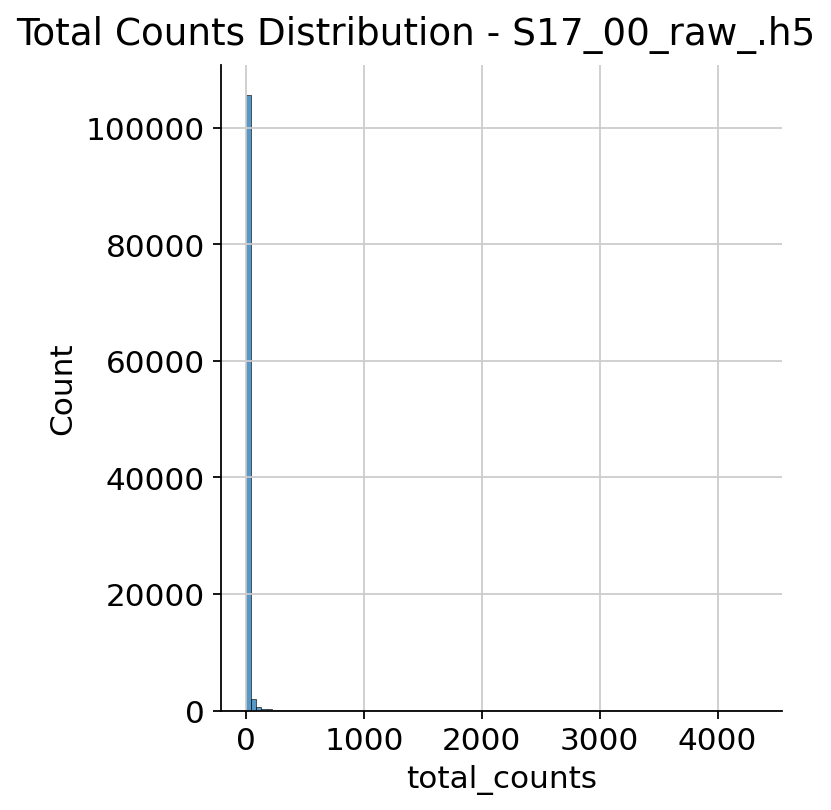

<Figure size 480x320 with 0 Axes>

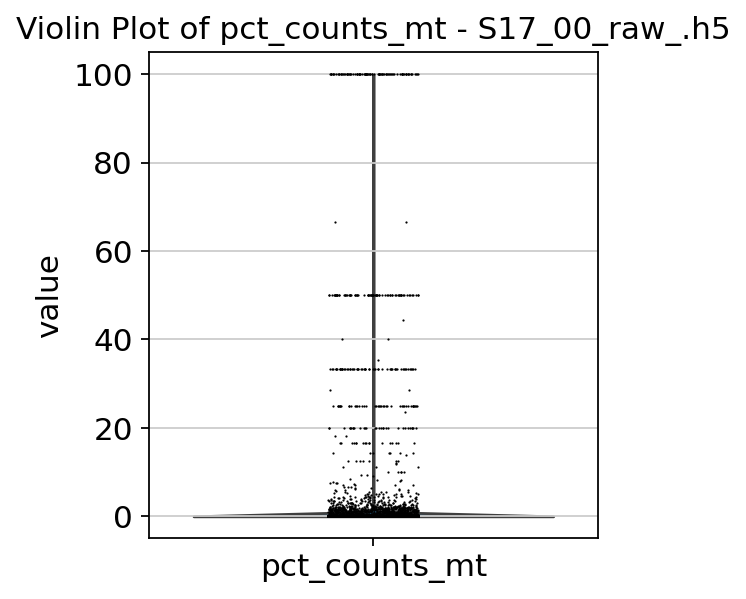

<Figure size 480x320 with 0 Axes>

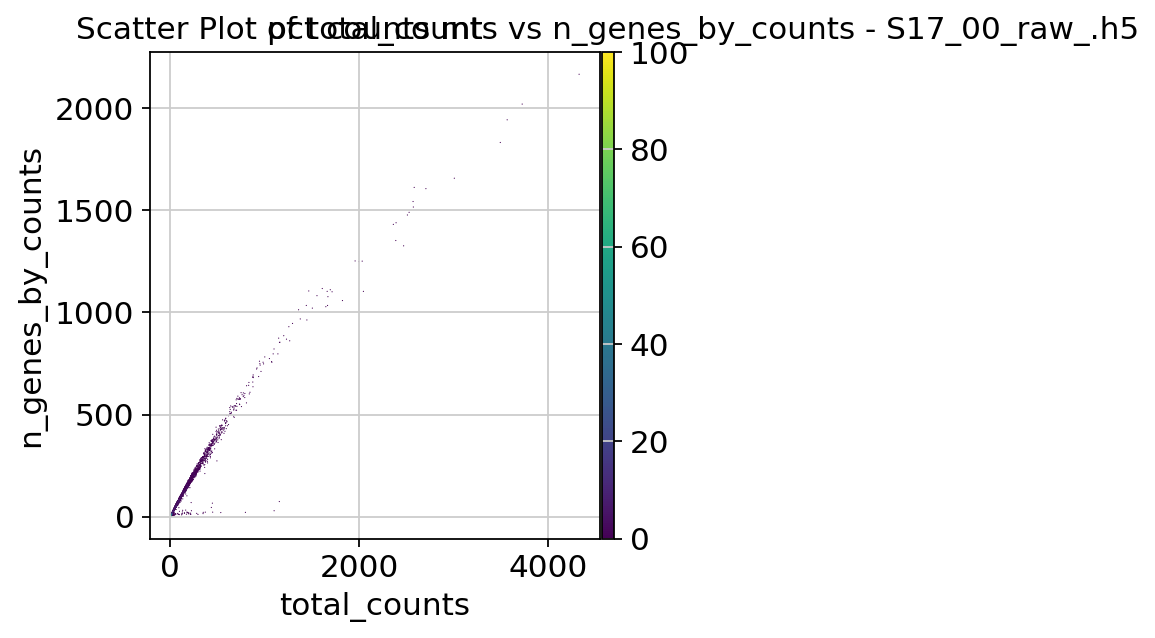

In [8]:
import os
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

# Path to your folder containing the .h5 files
folder_path = "/mnt/c/Users/ethan/OneDrive/桌面/sc1186deepseq/data/"

# List all files in the folder
files = [f for f in os.listdir(folder_path) if f.endswith("_raw_.h5")]

# Loop through each file, process the data, and generate plots
for file in files:
    print(f"Processing file: {file}")
    
    # Load the data from the .h5 file
    file_path = os.path.join(folder_path, file)
    adata = sc.read_10x_h5(file_path)
    
    # Make variable names unique
    adata.var_names_make_unique()
    
    # Annotate mitochondrial, ribosomal, and hemoglobin genes
    adata.var["mt"] = adata.var_names.str.startswith("MT-")
    adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))
    adata.var["hb"] = adata.var_names.str.contains(("^HB[^(P)]"))
    
    # Calculate quality control metrics
    sc.pp.calculate_qc_metrics(adata, qc_vars=["mt", "ribo", "hb"], inplace=True, percent_top=[20], log1p=True)
    
    # Generate and save plots
    # Plot 1: Distribution of total counts
    p1 = sns.displot(adata.obs["total_counts"], bins=100, kde=False)
    p1.fig.suptitle(f"Total Counts Distribution - {file}", y=1.02)
    p1.savefig(f"{folder_path}/{file}_total_counts_dist.png")
    
    # Plot 2: Violin plot for mitochondrial counts
    plt.figure(figsize=(6, 4))
    sc.pl.violin(adata, "pct_counts_mt", show=False)
    plt.title(f"Violin Plot of pct_counts_mt - {file}")
    plt.savefig(f"{folder_path}/{file}_violin_pct_counts_mt.png")
    
    # Plot 3: Scatter plot of total counts vs number of genes, colored by pct_counts_mt
    plt.figure(figsize=(6, 4))
    sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt", show=False)
    plt.title(f"Scatter Plot of total_counts vs n_genes_by_counts - {file}")
    plt.savefig(f"{folder_path}/{file}_scatter_total_counts_vs_genes.png")
    
    print(f"Plots saved for file: {file}\n")

print("All files processed and plots saved.")


Processing file: 2054_00_cleaned.h5ad


/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Plots saved for file: 2054_00_cleaned.h5ad

Processing file: 2060_41_cleaned.h5ad


/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Plots saved for file: 2060_41_cleaned.h5ad

Processing file: 2070_00_cleaned.h5ad


/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Plots saved for file: 2070_00_cleaned.h5ad

Processing file: 2072_00_cleaned.h5ad


/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Plots saved for file: 2072_00_cleaned.h5ad

Processing file: 2074_00_cleaned.h5ad


/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/seaborn/axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)
/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass

Plots saved for file: 2074_00_cleaned.h5ad

Processing file: 2075_00_cleaned.h5ad


/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Plots saved for file: 2075_00_cleaned.h5ad

Processing file: 2094_01_cleaned.h5ad


/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Plots saved for file: 2094_01_cleaned.h5ad

Processing file: S14_00_cleaned.h5ad


/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Plots saved for file: S14_00_cleaned.h5ad

Processing file: S15_00_cleaned.h5ad


/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Plots saved for file: S15_00_cleaned.h5ad

Processing file: S16_00_cleaned.h5ad


/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Plots saved for file: S16_00_cleaned.h5ad

Processing file: S17_00_cleaned.h5ad


/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Plots saved for file: S17_00_cleaned.h5ad

All files processed and plots saved.


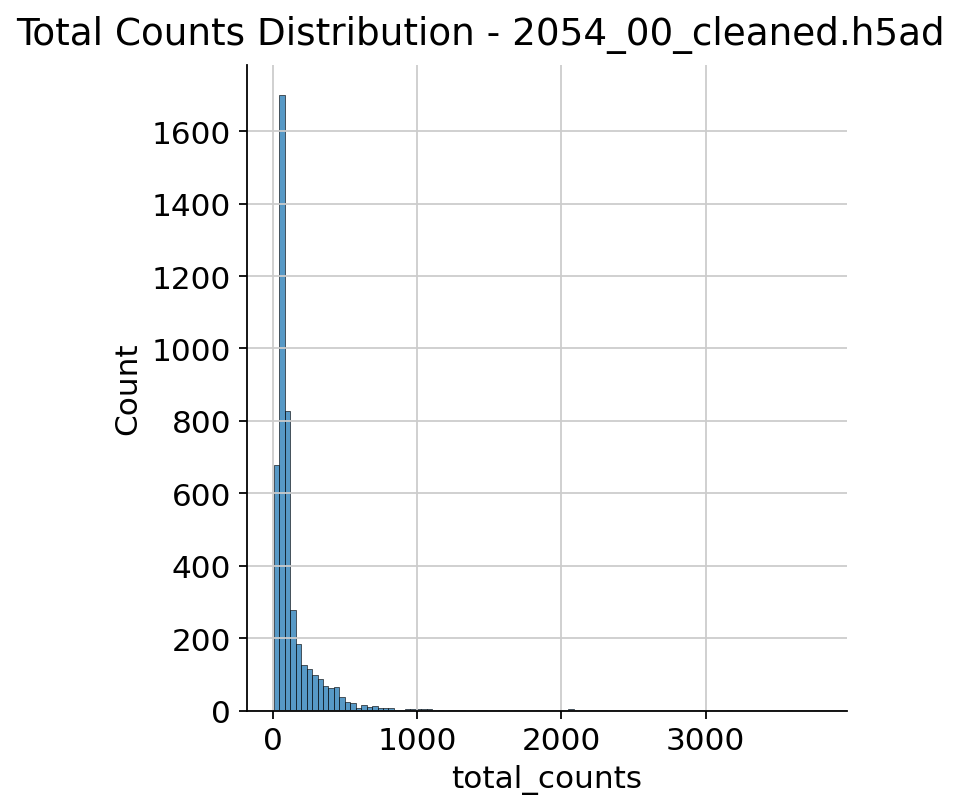

<Figure size 480x320 with 0 Axes>

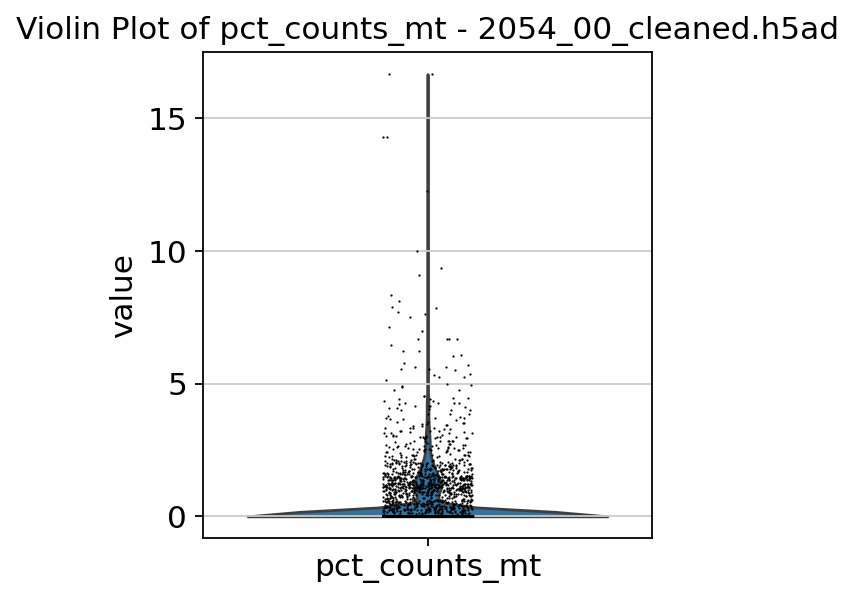

<Figure size 480x320 with 0 Axes>

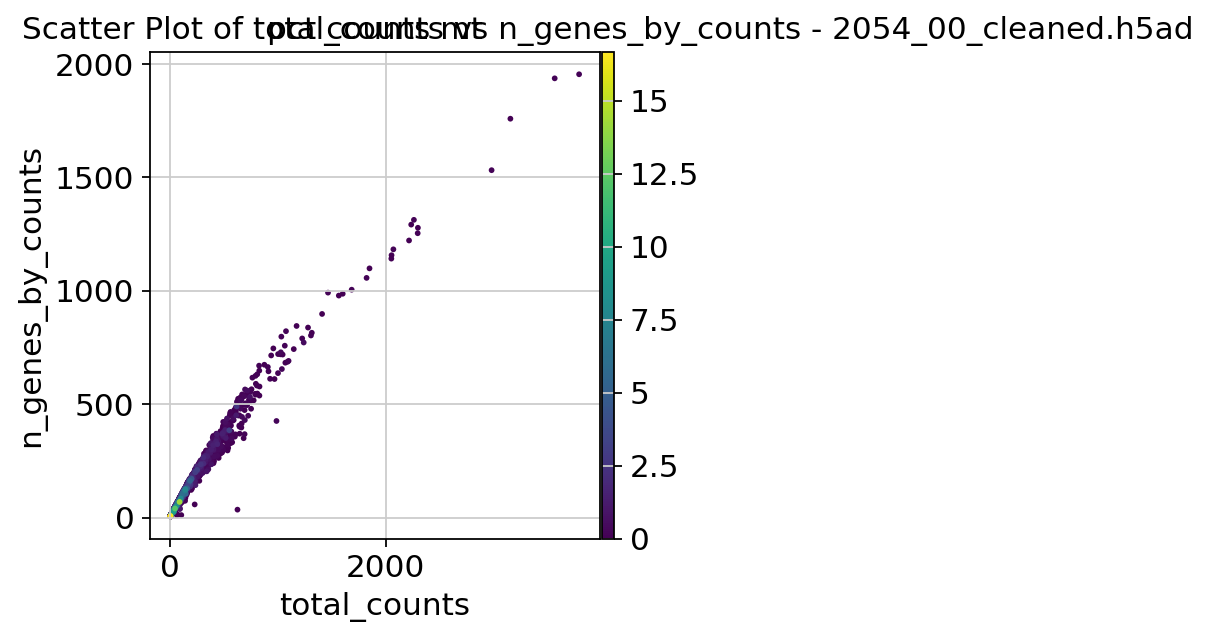

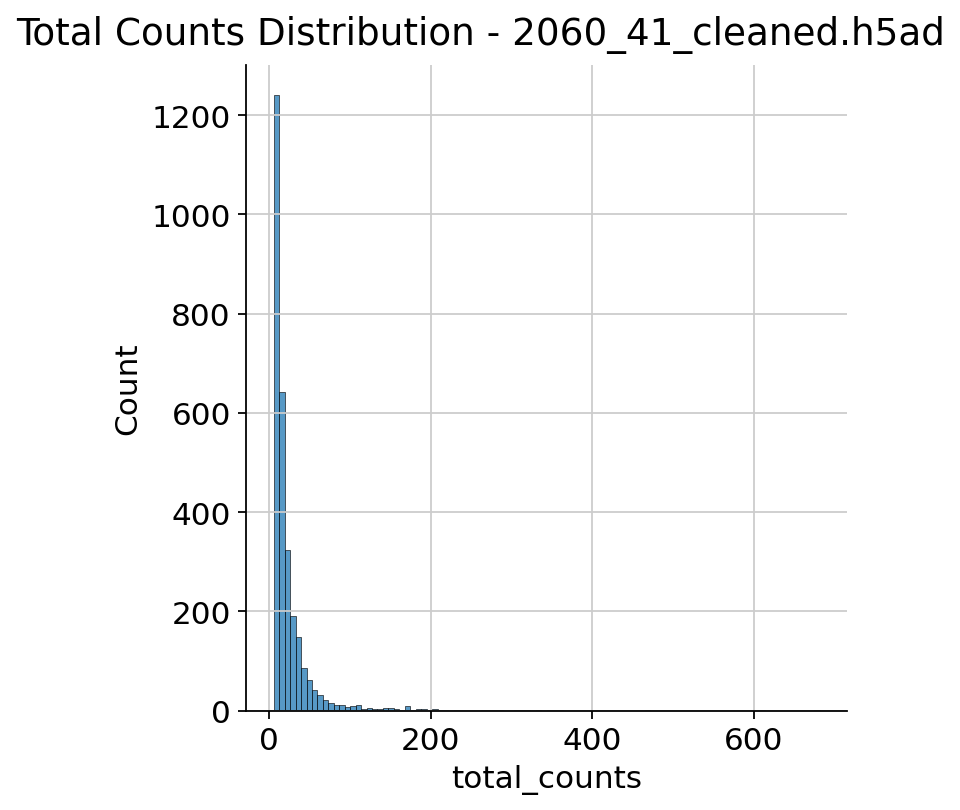

<Figure size 480x320 with 0 Axes>

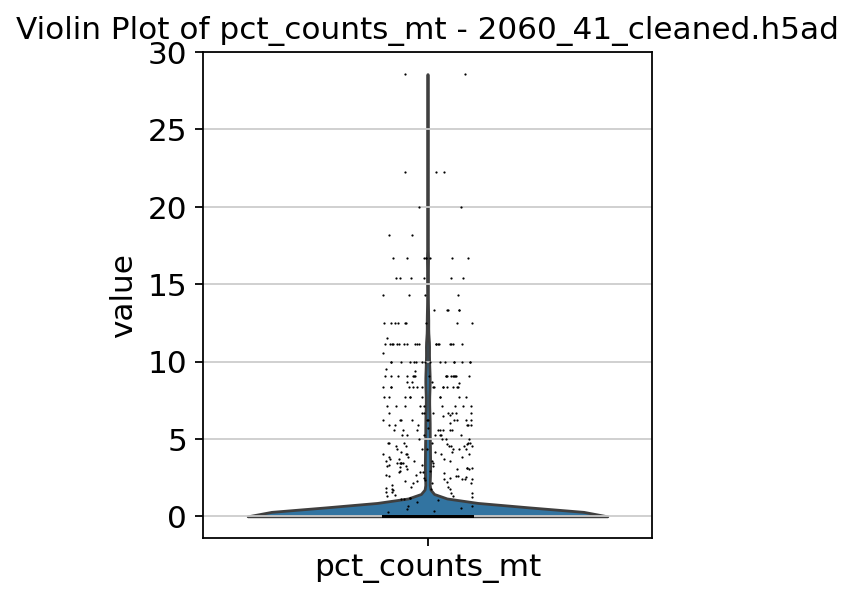

<Figure size 480x320 with 0 Axes>

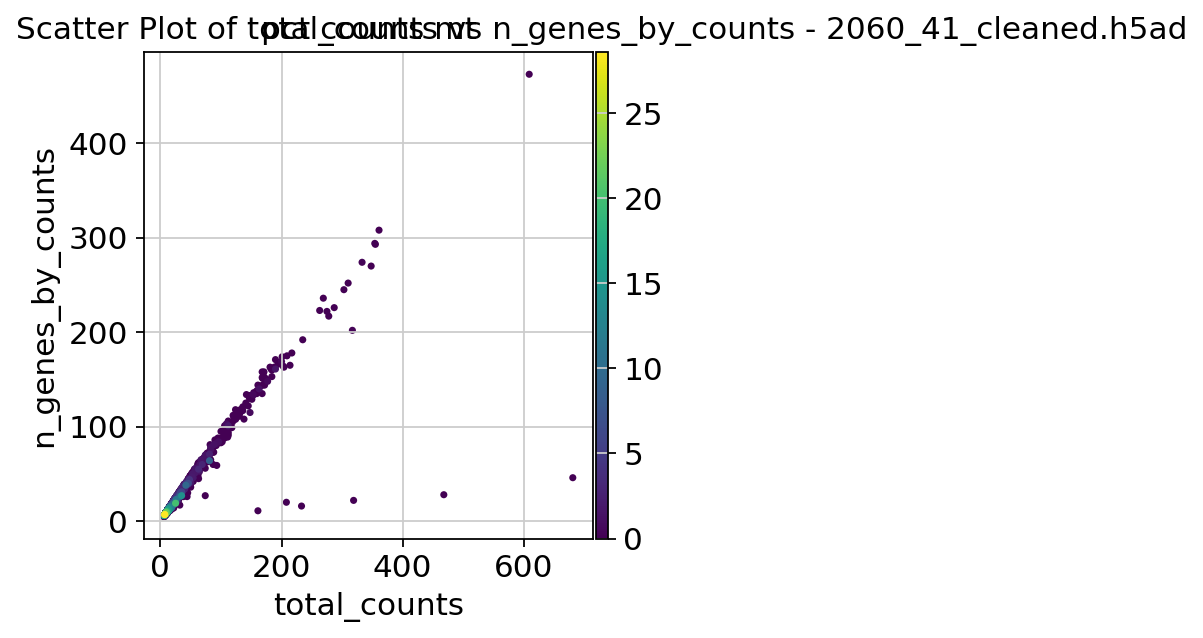

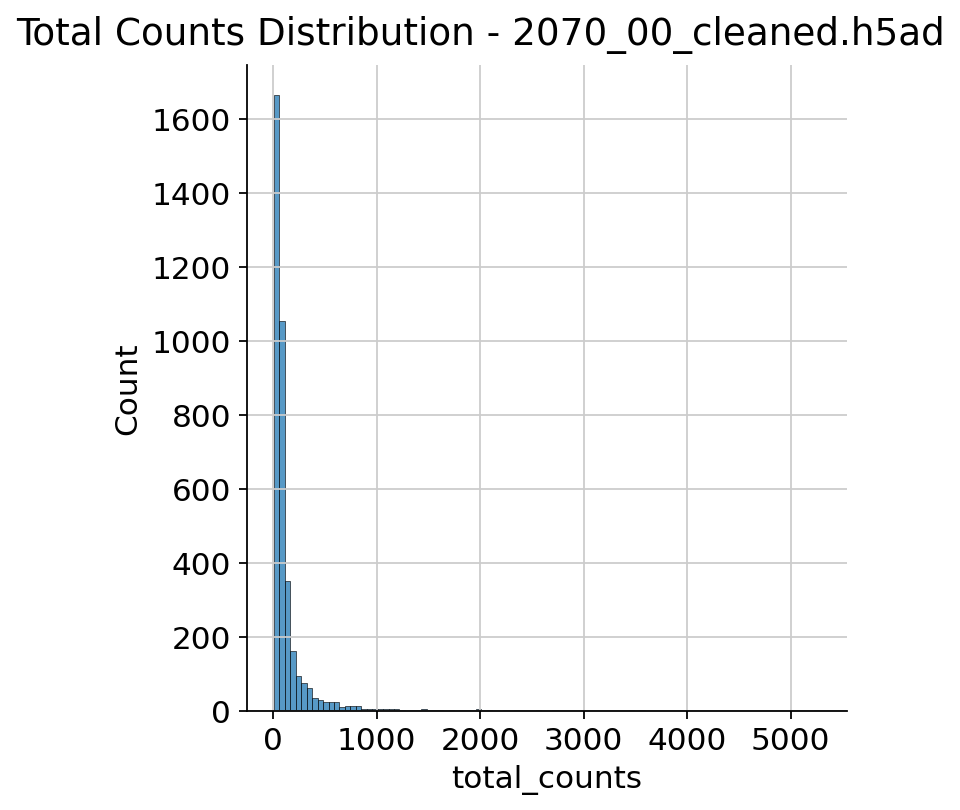

<Figure size 480x320 with 0 Axes>

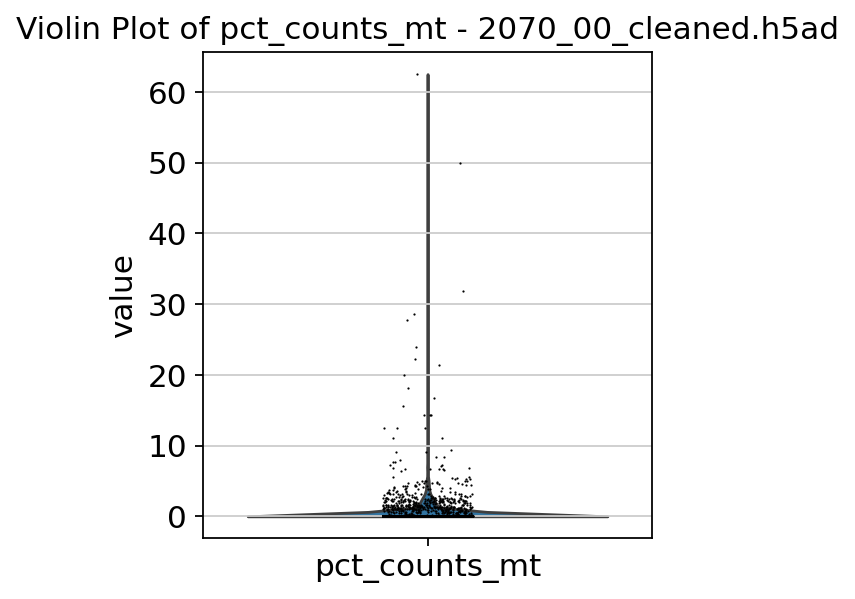

<Figure size 480x320 with 0 Axes>

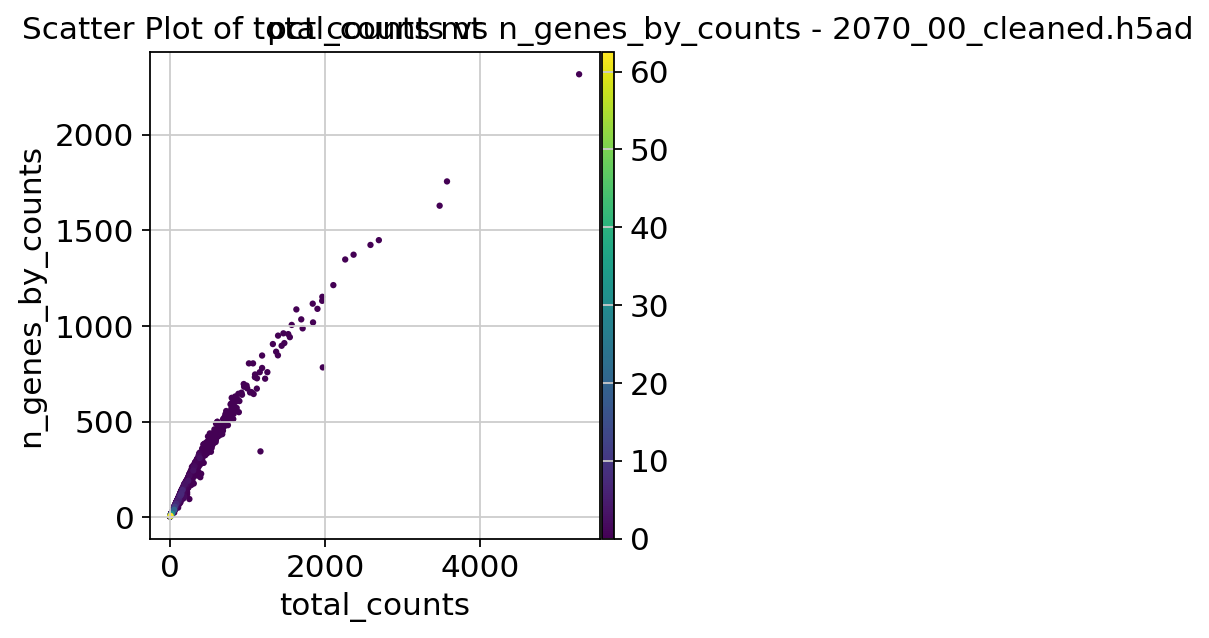

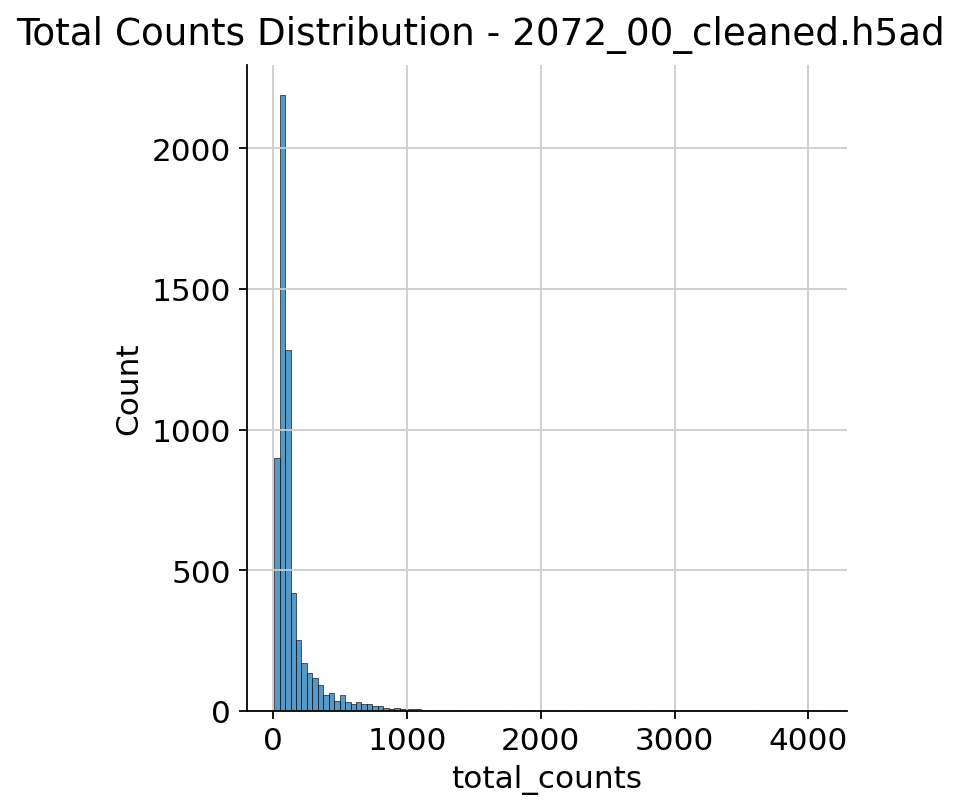

<Figure size 480x320 with 0 Axes>

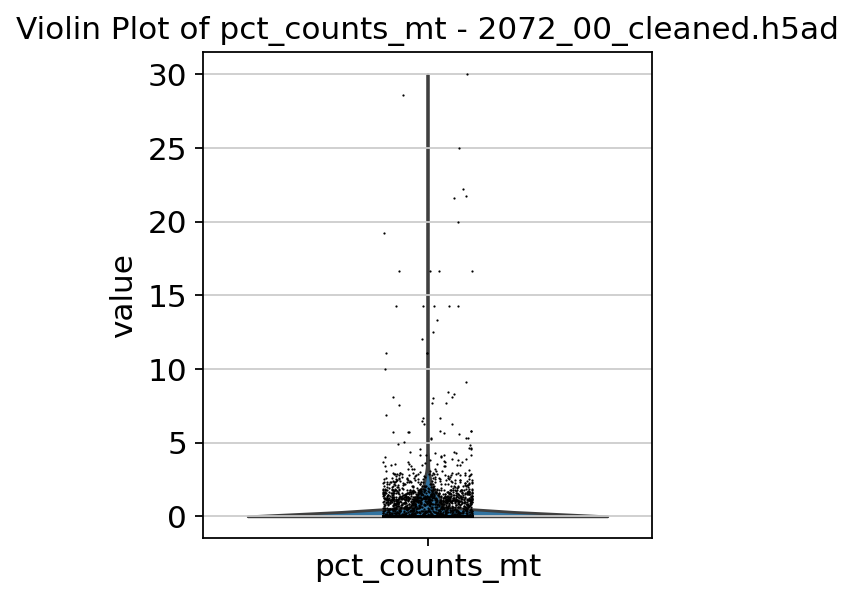

<Figure size 480x320 with 0 Axes>

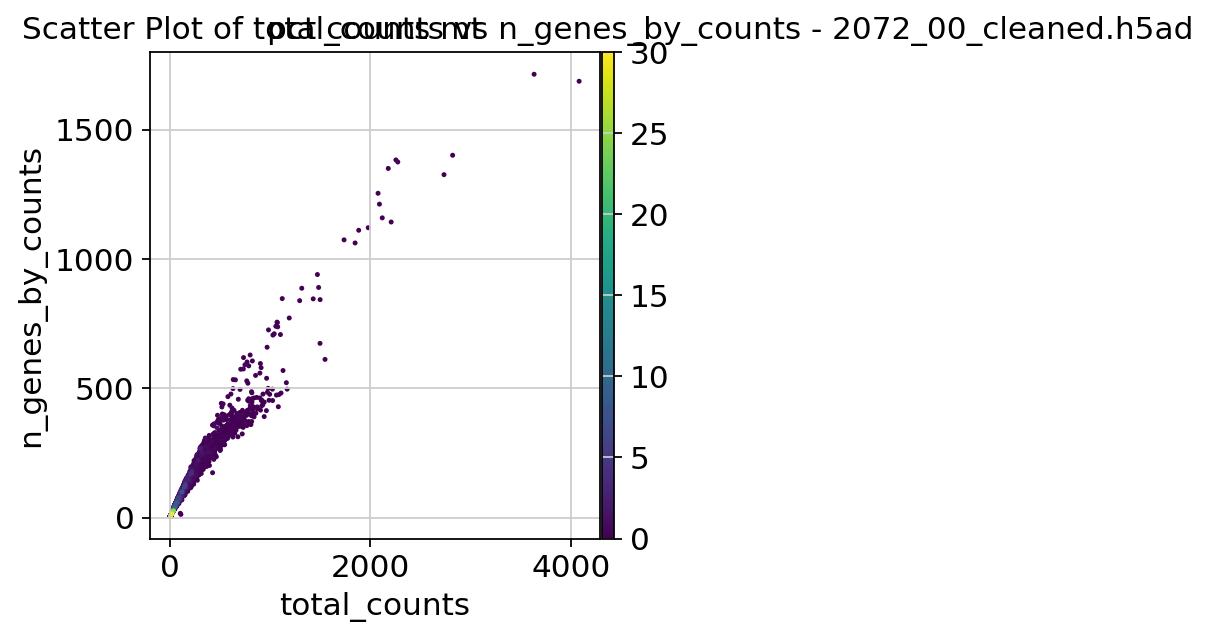

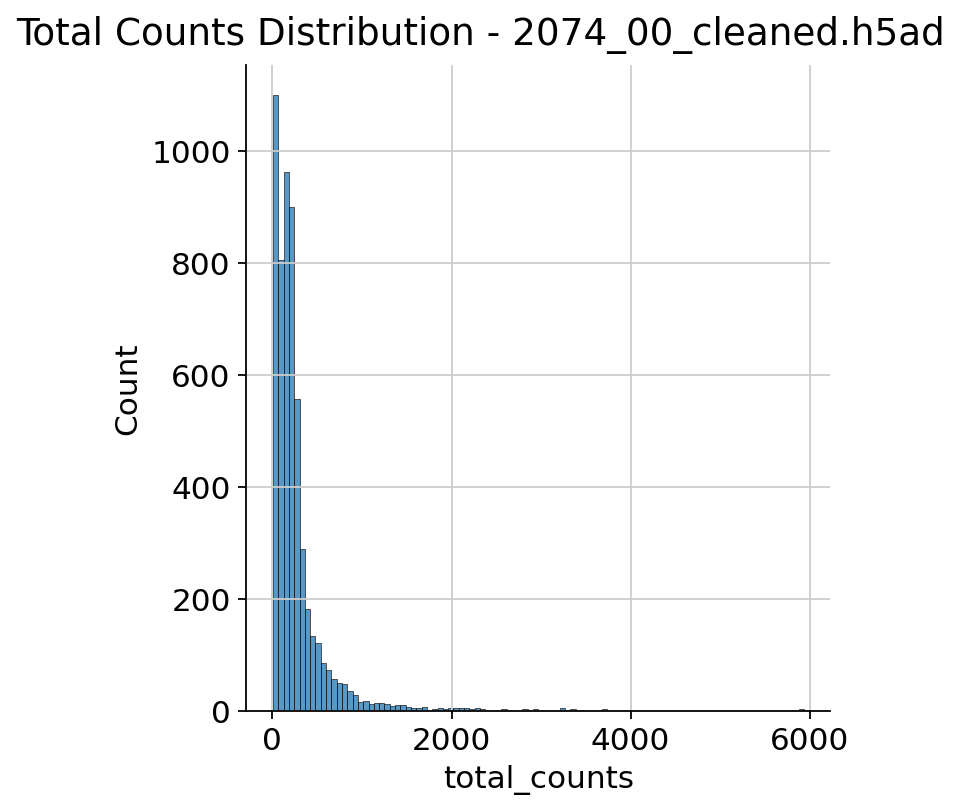

<Figure size 480x320 with 0 Axes>

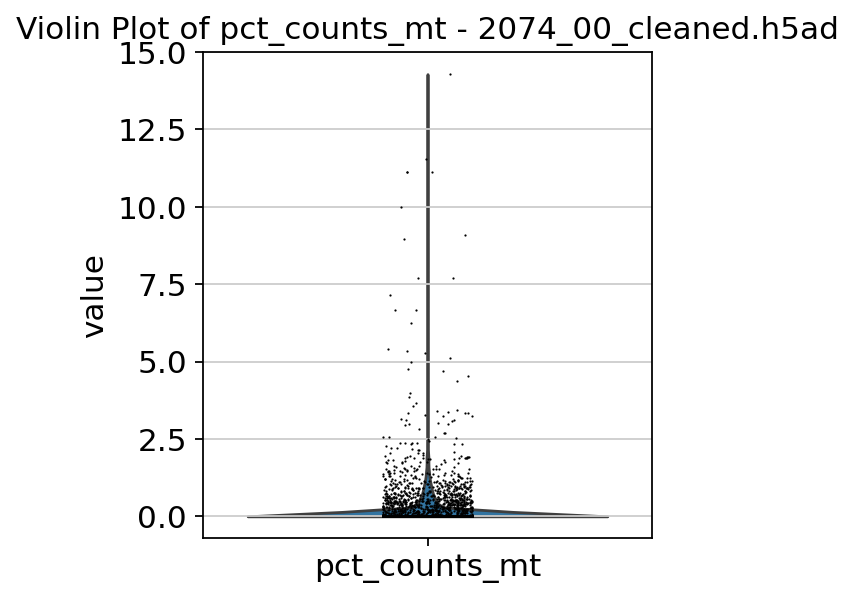

<Figure size 480x320 with 0 Axes>

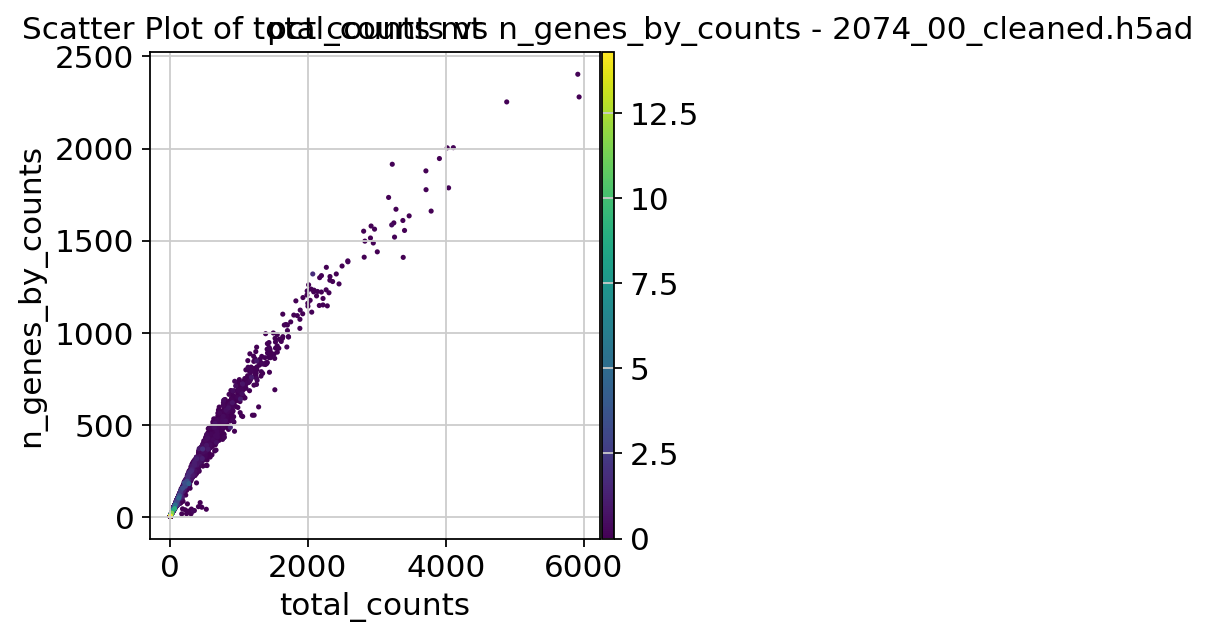

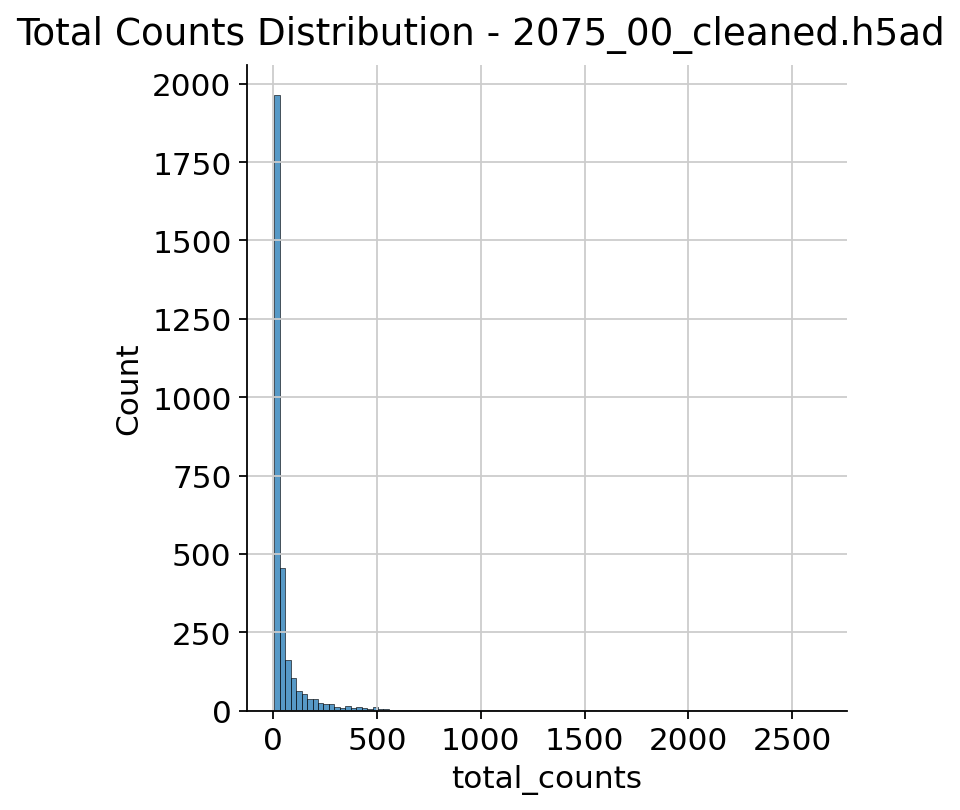

<Figure size 480x320 with 0 Axes>

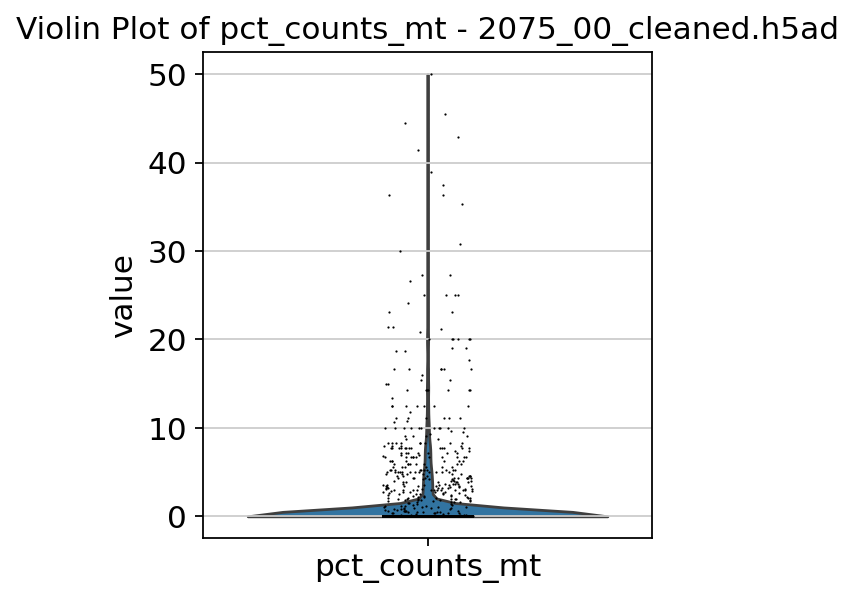

<Figure size 480x320 with 0 Axes>

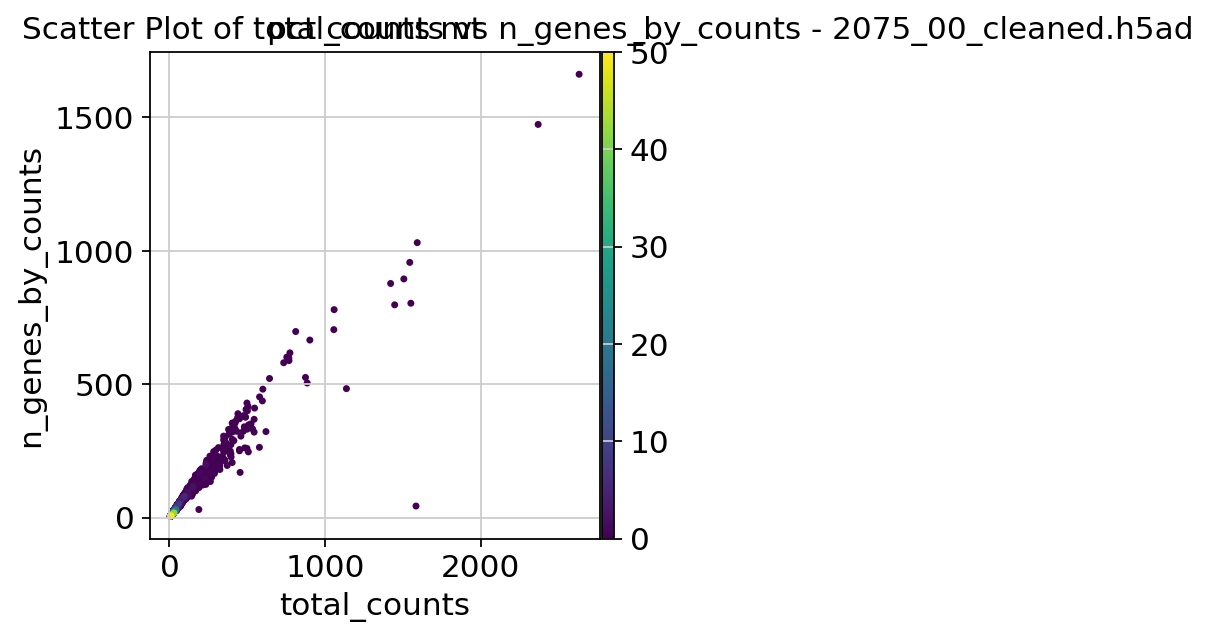

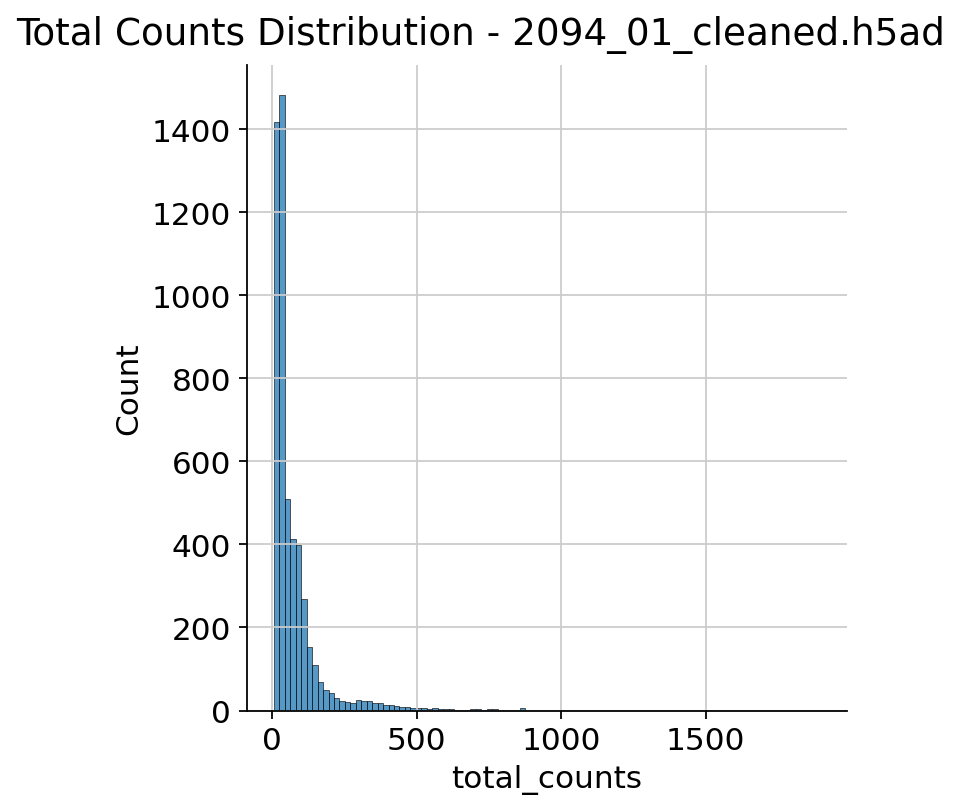

<Figure size 480x320 with 0 Axes>

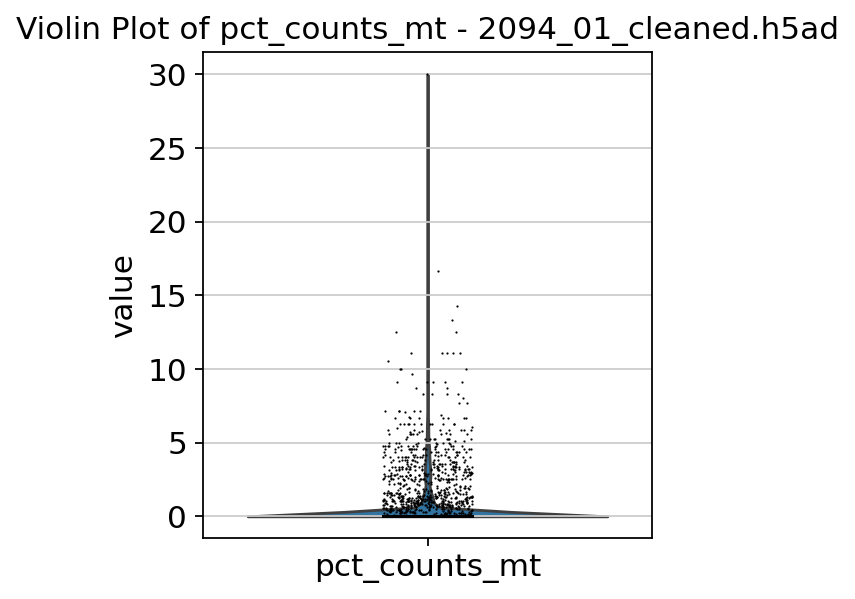

<Figure size 480x320 with 0 Axes>

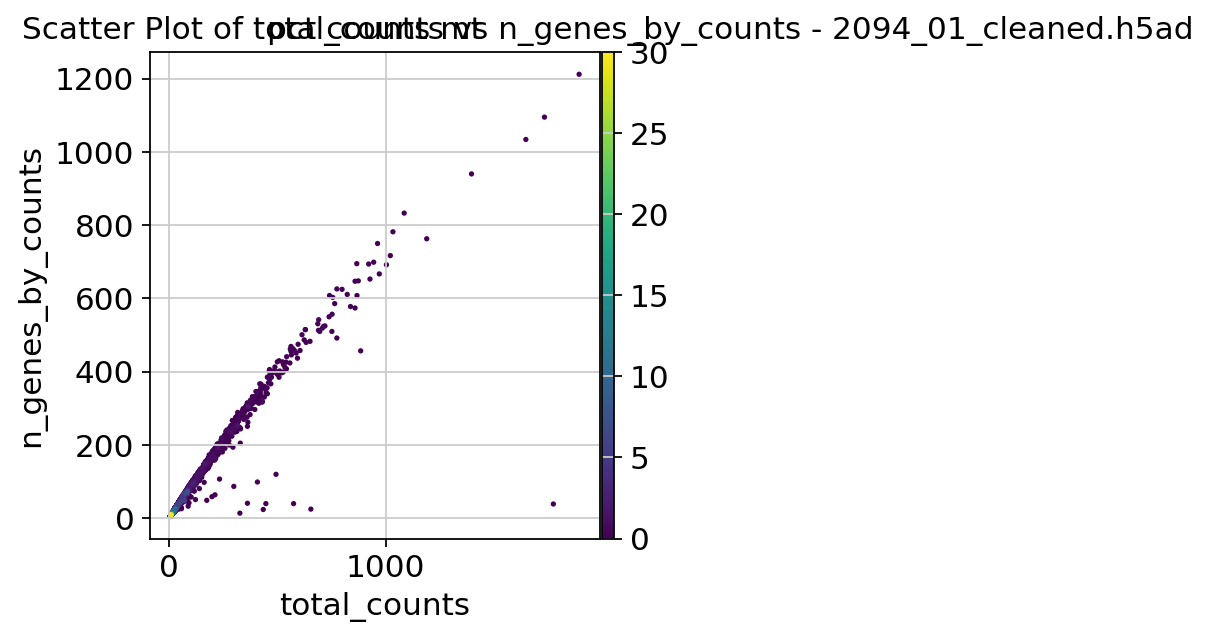

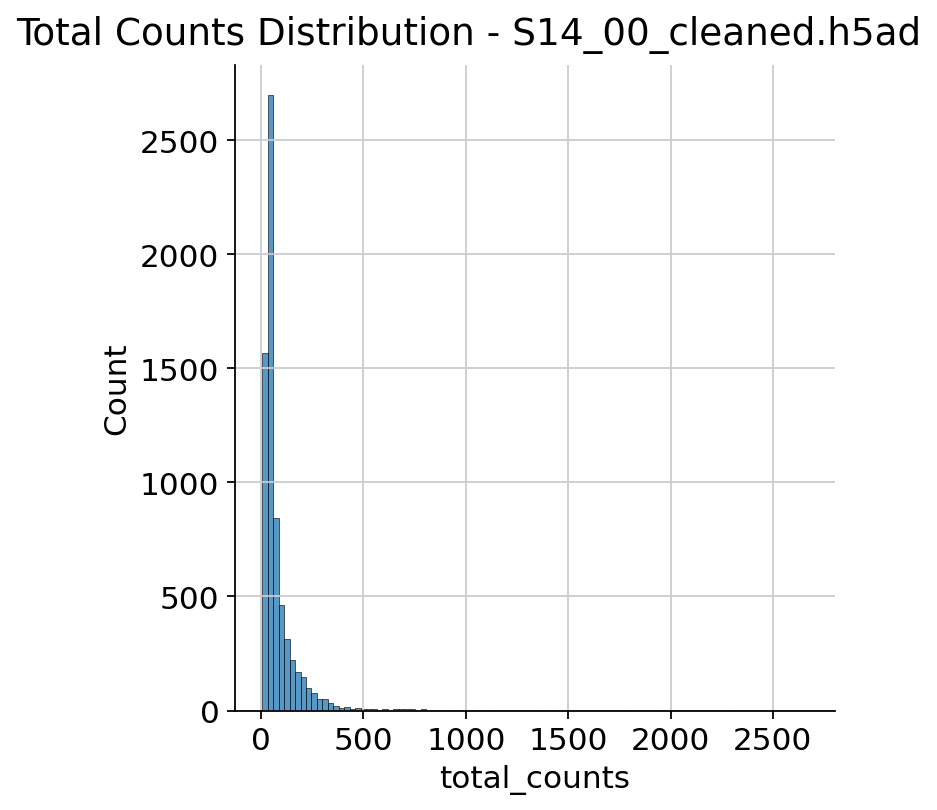

<Figure size 480x320 with 0 Axes>

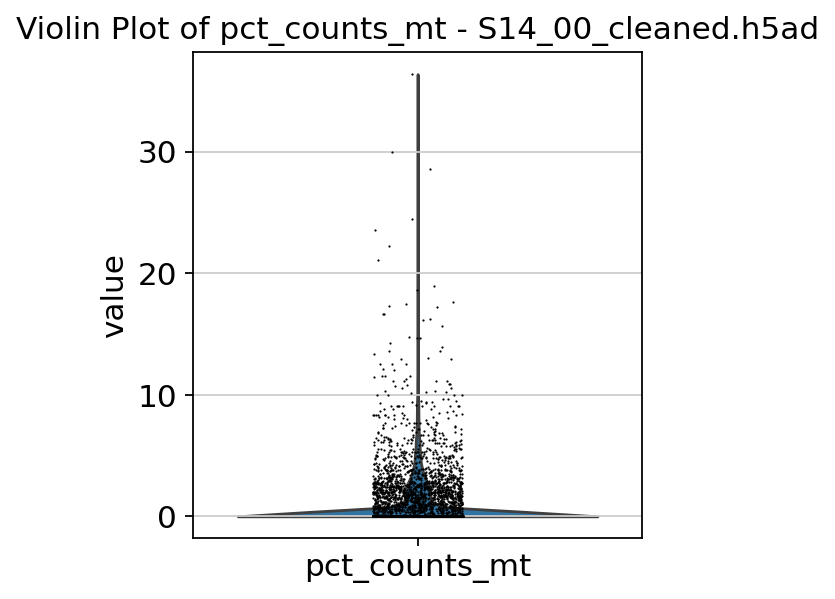

<Figure size 480x320 with 0 Axes>

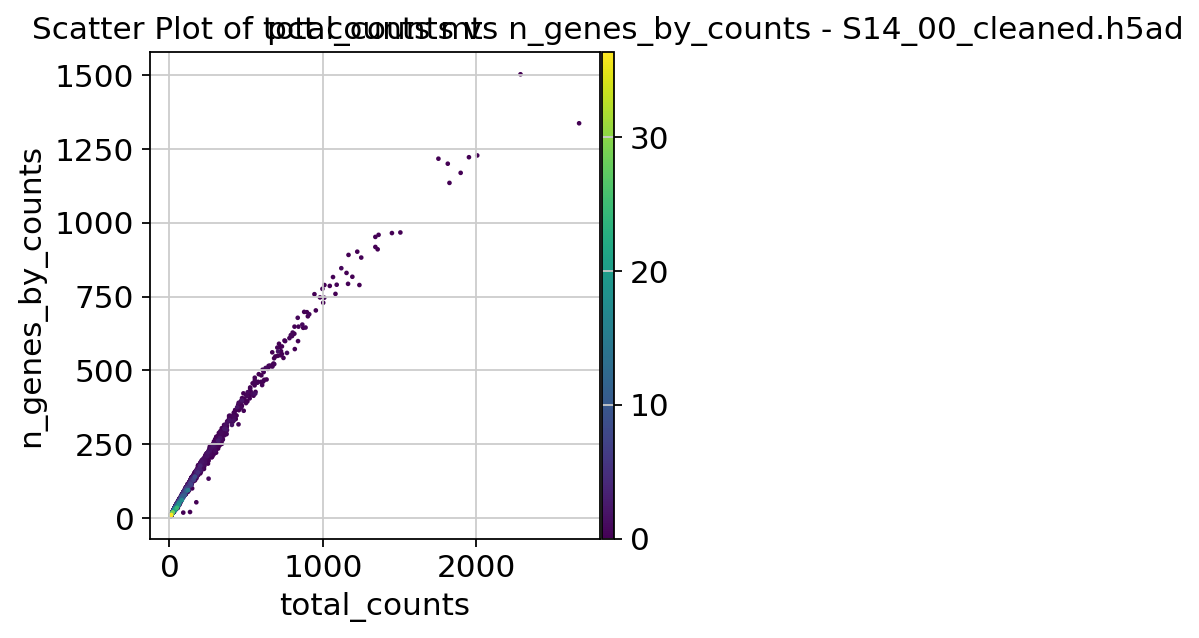

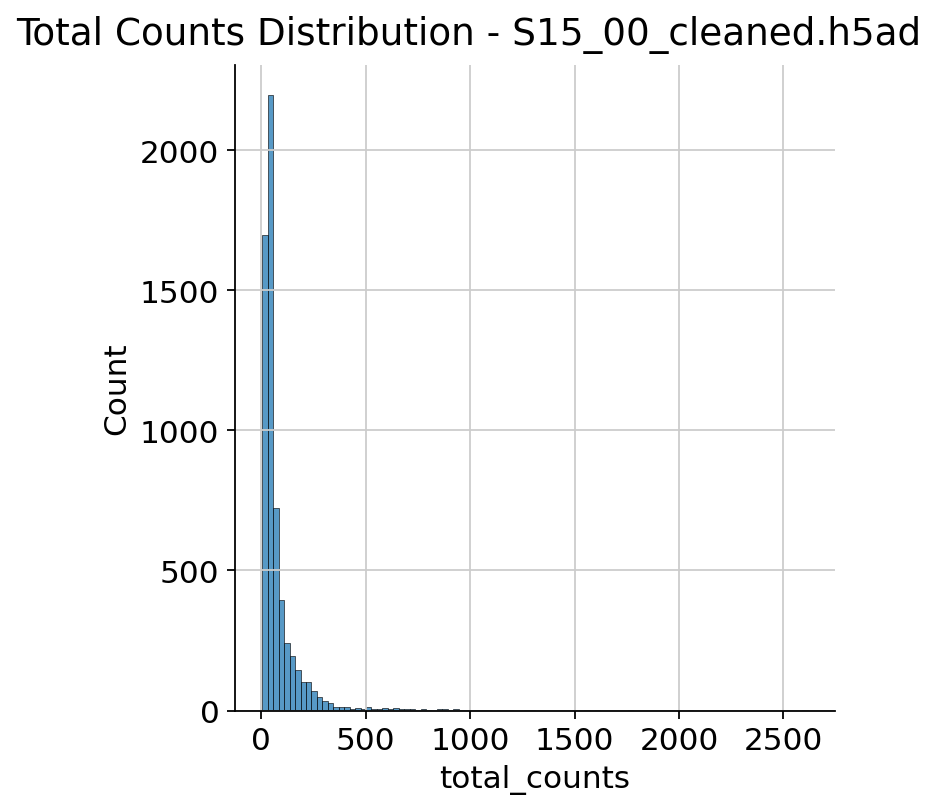

<Figure size 480x320 with 0 Axes>

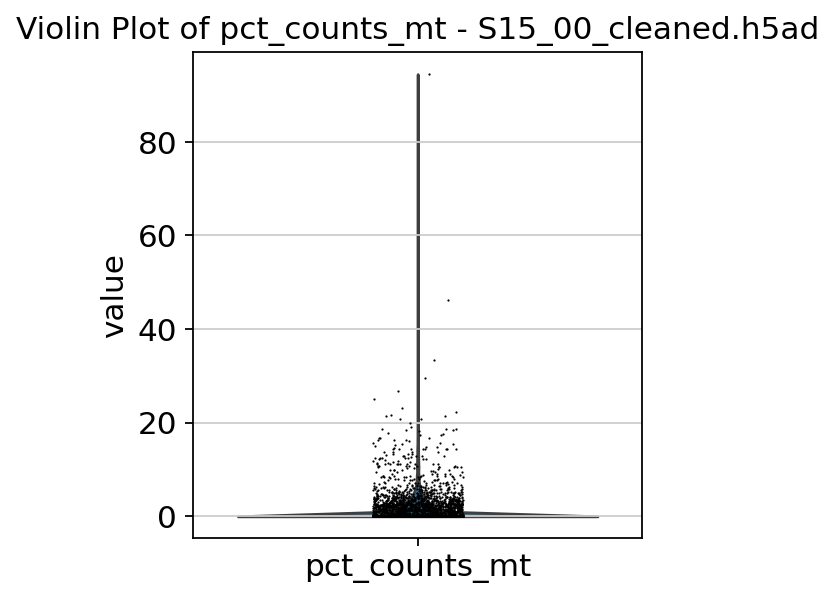

<Figure size 480x320 with 0 Axes>

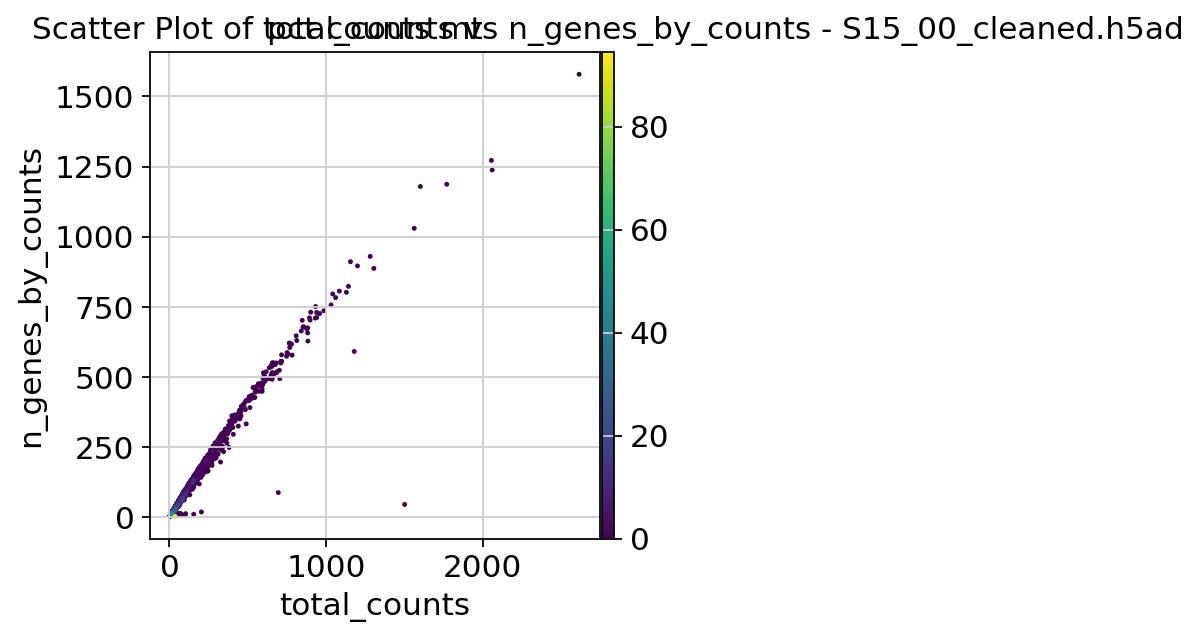

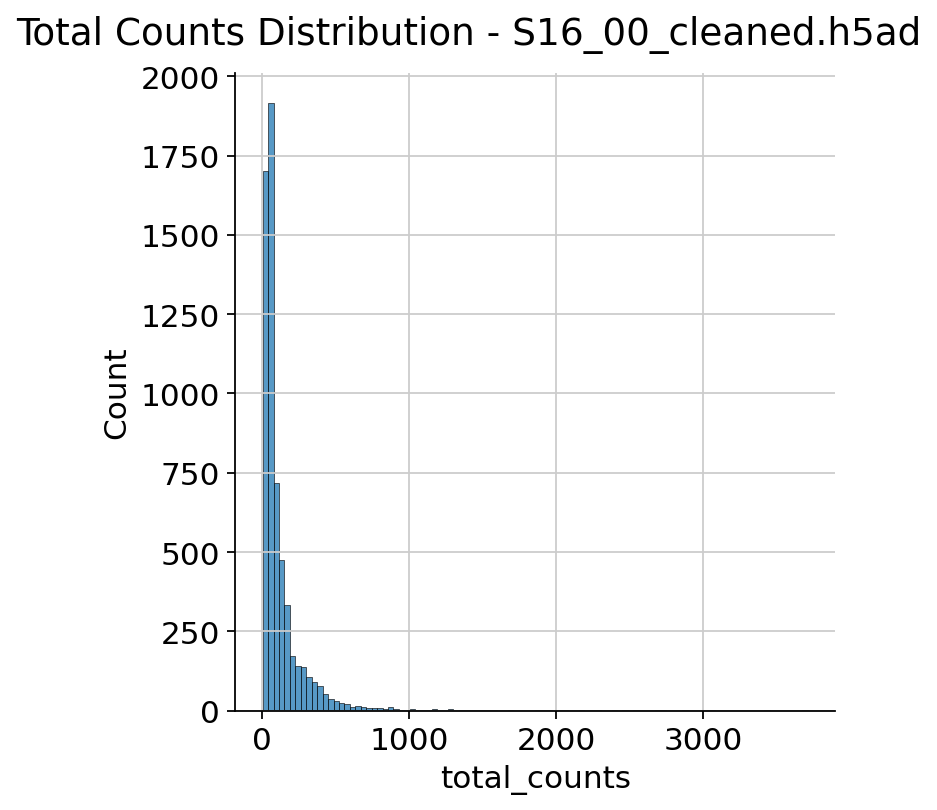

<Figure size 480x320 with 0 Axes>

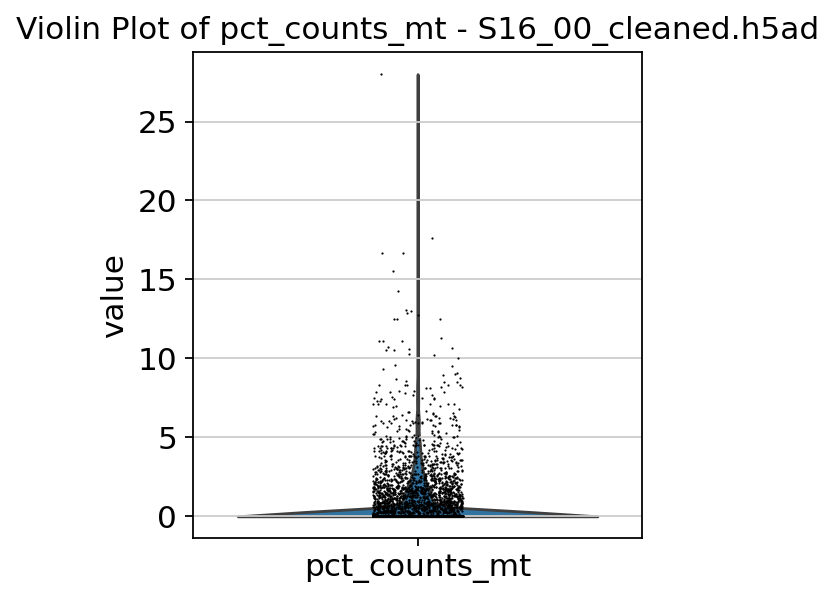

<Figure size 480x320 with 0 Axes>

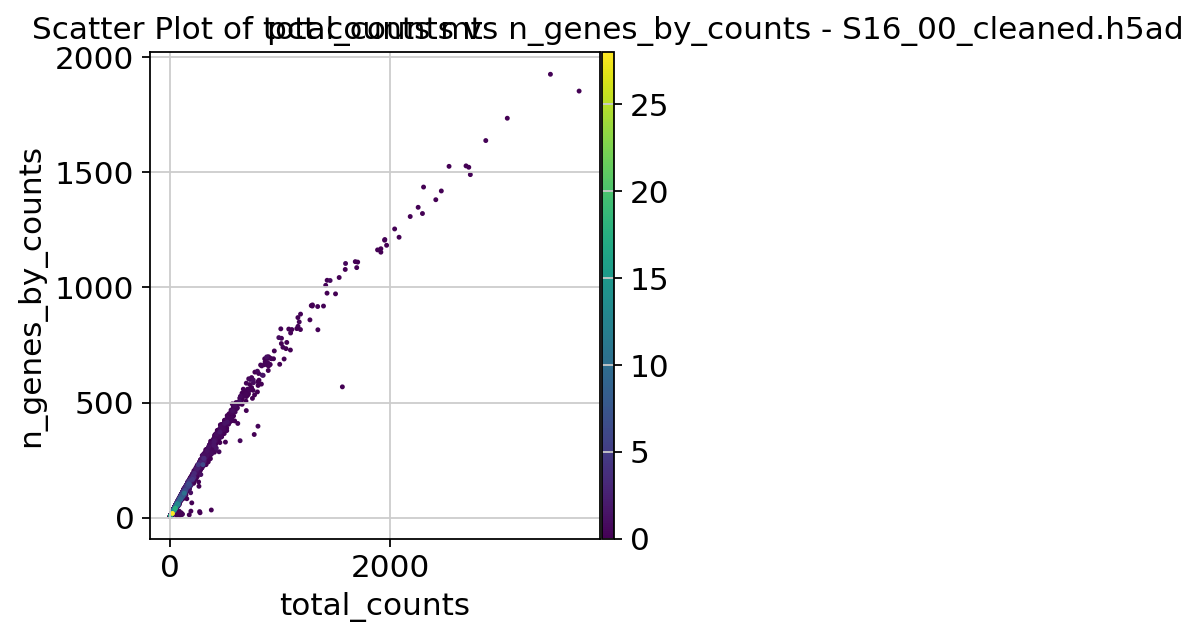

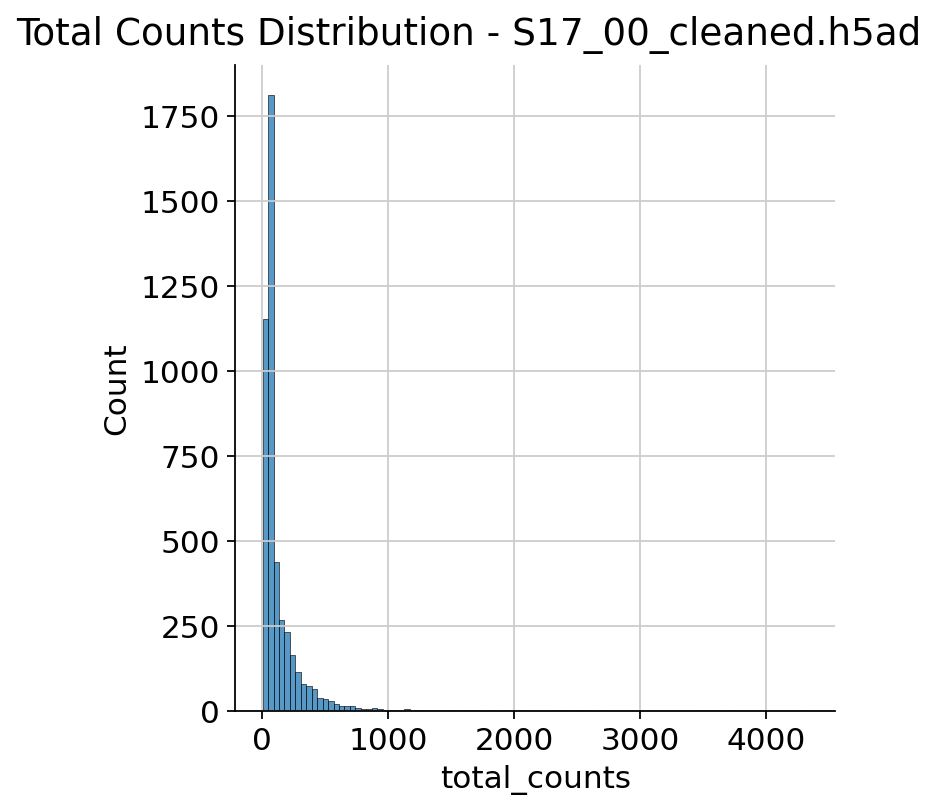

<Figure size 480x320 with 0 Axes>

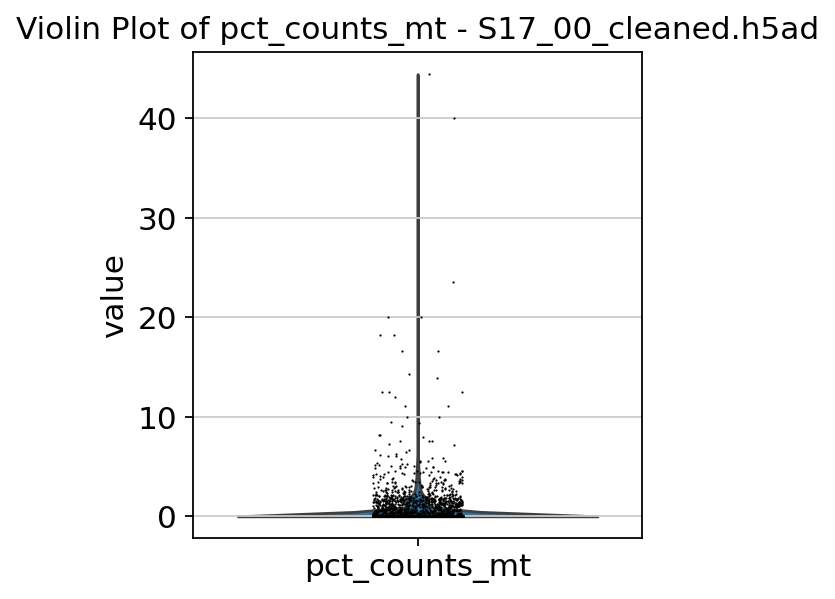

<Figure size 480x320 with 0 Axes>

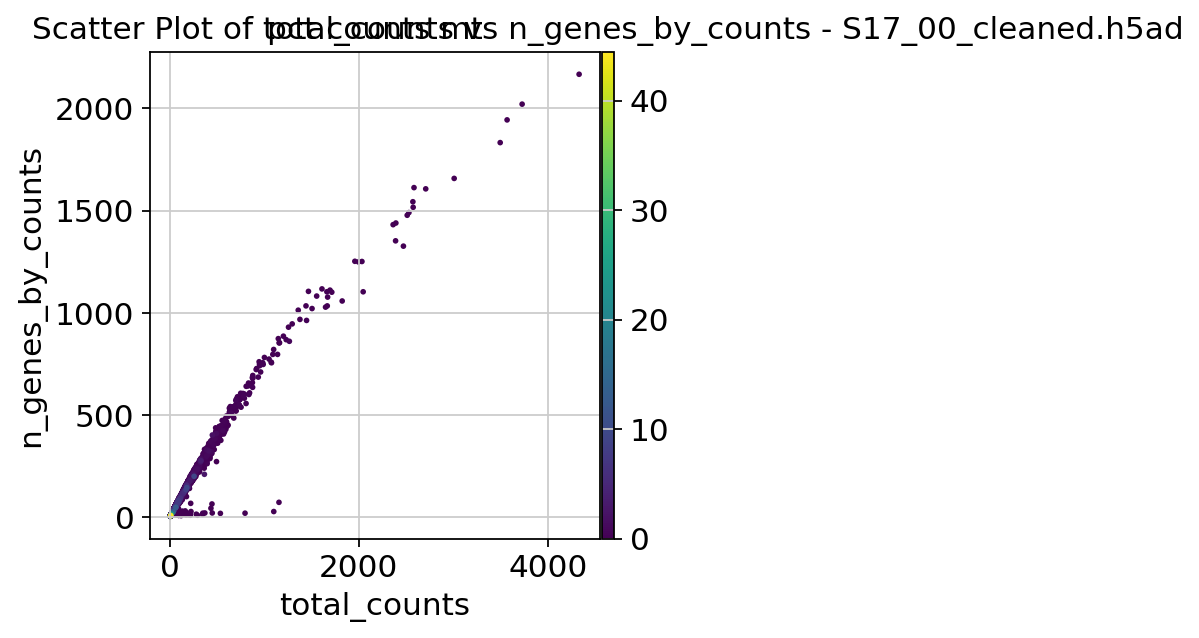

In [13]:
import os
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

# Path to your folder containing the .h5ad files
folder_path = "/mnt/c/Users/ethan/OneDrive/桌面/sc1186deepseq/data/"

# List all files in the folder
files = [f for f in os.listdir(folder_path) if f.endswith("cleaned.h5ad")]

# Loop through each file, process the data, and generate plots
for file in files:
    print(f"Processing file: {file}")
    
    # Load the data from the .h5ad file
    file_path = os.path.join(folder_path, file)
    adata = sc.read_h5ad(file_path)
    
    # Make variable names unique
    adata.var_names_make_unique()
    
    # Annotate mitochondrial, ribosomal, and hemoglobin genes
    adata.var["mt"] = adata.var_names.str.startswith("MT-")
    adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))
    adata.var["hb"] = adata.var_names.str.contains(("^HB[^(P)]"))
    
    # Calculate quality control metrics
    sc.pp.calculate_qc_metrics(adata, qc_vars=["mt", "ribo", "hb"], inplace=True, percent_top=[20], log1p=True)
    
    # Generate and save plots
    # Plot 1: Distribution of total counts
    p1 = sns.displot(adata.obs["total_counts"], bins=100, kde=False)
    p1.figure.suptitle(f"Total Counts Distribution - {file}", y=1.02)
    plt.savefig(f"{folder_path}/{file}_total_counts_dist_postclean.png")
    
    # Plot 2: Violin plot for mitochondrial counts
    plt.figure(figsize=(6, 4))
    sc.pl.violin(adata, "pct_counts_mt", show=False)
    plt.title(f"Violin Plot of pct_counts_mt - {file}")
    plt.savefig(f"{folder_path}/{file}_violin_pct_counts_mt_postclean.png")
    
    # Plot 3: Scatter plot of total counts vs number of genes, colored by pct_counts_mt
    plt.figure(figsize=(6, 4))
    sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt", show=False)
    plt.title(f"Scatter Plot of total_counts vs n_genes_by_counts - {file}")
    plt.savefig(f"{folder_path}/{file}_scatter_total_counts_vs_genes_postclean.png")
    
    print(f"Plots saved for file: {file}\n")

print("All files processed and plots saved.")
